# Dataset Overview

This dataset pertains to **lung cancer detection** and involves the analysis of demographic, behavioral, and clinical attributes. The primary objective is to identify potential risk factors and symptomatic indicators associated with lung cancer, thereby supporting early diagnostic efforts.

- **Number of Instances:** 284  
- **Number of Attributes:** 16 (including the target variable `LUNG_CANCER`)  
- **Attribute Categories:**  
  - **Demographic:** Gender, Age  
  - **Behavioral:** Smoking, Alcohol Consumption, Peer Pressure  
  - **Medical/Symptoms:** Yellow Fingers, Anxiety, Fatigue, Allergy, Wheezing, Coughing, Shortness of Breath, Swallowing Difficulty, Chest Pain  
- **Target Variable:** `LUNG_CANCER` (Binary Classification: YES/NO)

---

## Study Objectives

1. **Prediction of Lung Cancer Risk**  
   Develop machine learning models to classify individuals as either having lung cancer (YES) or not (NO) based on the identified features.

2. **Analysis of Feature Importance**  
   Determine the most influential attributes—whether symptomatic, behavioral, or demographic—that contribute to accurate classification.

3. **Evaluation of Model Performance**  
   Assess and compare the performance of various machine learning algorithms (e.g., Logistic Regression, Random Forest, Support Vector Classifier) to identify the most accurate and reliable approach.

4. **Mitigation of Class Imbalance**  
   Address potential imbalances in the target variable through advanced resampling techniques such as ADASYN to enhance minority class detection and overall model performance.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

**Importing our Database**


The link to the Lung Cancer Data Set is: **https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data**

In [180]:
#Loading the dataset

df=pd.read_csv('/survey lung cancer.csv')

In [181]:
#Displaying basic information about the dataset

print('\nDataset shape: ', df.shape)
display(df.head())

print('\n\n--Dataset information--\n')
print(df.info())

print('\n--Dataset statistical summary--\n')
print(df.describe().T)


Dataset shape:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO




--Dataset information--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 

In [182]:
#Checking for missing and duplicated values

print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'\nDuplicated values: {df.duplicated().sum()}')


Missing values: 0

Duplicated values: 33


In [183]:
#Extracting the duplicated rows

duplicated_rows=df[df.duplicated(keep=False)]
print('\n--Duplicated rows--\n')
display(duplicated_rows)

# Statistics for duplicated rows

duplicated_stats = duplicated_rows.describe(include='all').T
print("\nStatistics for duplicated rows:\n")
display(duplicated_stats)


--Duplicated rows--



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES



Statistics for duplicated rows:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,66,2,M,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,66.0,NaN,NaN,NaN,60.69697,6.346337,47.0,56.0,61.0,64.0,76.0
SMOKING,66.0,NaN,NaN,NaN,1.727273,0.448775,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
ANXIETY,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
PEER_PRESSURE,66.0,NaN,NaN,NaN,1.454545,0.501745,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,66.0,NaN,NaN,NaN,1.363636,0.484732,1.0,1.0,1.0,2.0,2.0
FATIGUE,66.0,NaN,NaN,NaN,1.757576,0.431834,1.0,2.0,2.0,2.0,2.0
ALLERGY,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0
WHEEZING,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0


In [184]:
#Removing the duplicates

df.drop_duplicates(inplace=True)
print('New shape of the dataset: ',df.shape)

New shape of the dataset:  (276, 16)


In [185]:
# Displaying the number of unique values in each column

print("\nUnique vlaues:")
print(df.nunique())


Unique vlaues:
GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


## Data Overview

### 1. Binary Variables
- Encoded as: **YES = 2, NO = 1**
- Features:
  - SMOKING  
  - YELLOW_FINGERS  
  - ANXIETY  
  - PEER_PRESSURE  
  - CHRONIC DISEASE  
  - FATIGUE  
  - ALLERGY  
  - WHEEZING  
  - ALCOHOL CONSUMING  
  - COUGHING  
  - SHORTNESS OF BREATH  
  - SWALLOWING DIFFICULTY  
  - CHEST PAIN  
  - LUNG_CANCER  

---

### 2. Demographic Variables
- **GENDER**: 2 unique values (M, F)  
- **AGE**: 39 unique values, covering a wide range of distinct ages


In [186]:
# Separating numerical and categorical features

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Displaying them

print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)

Numerical Columns: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

Categorical Columns: ['GENDER', 'LUNG_CANCER']


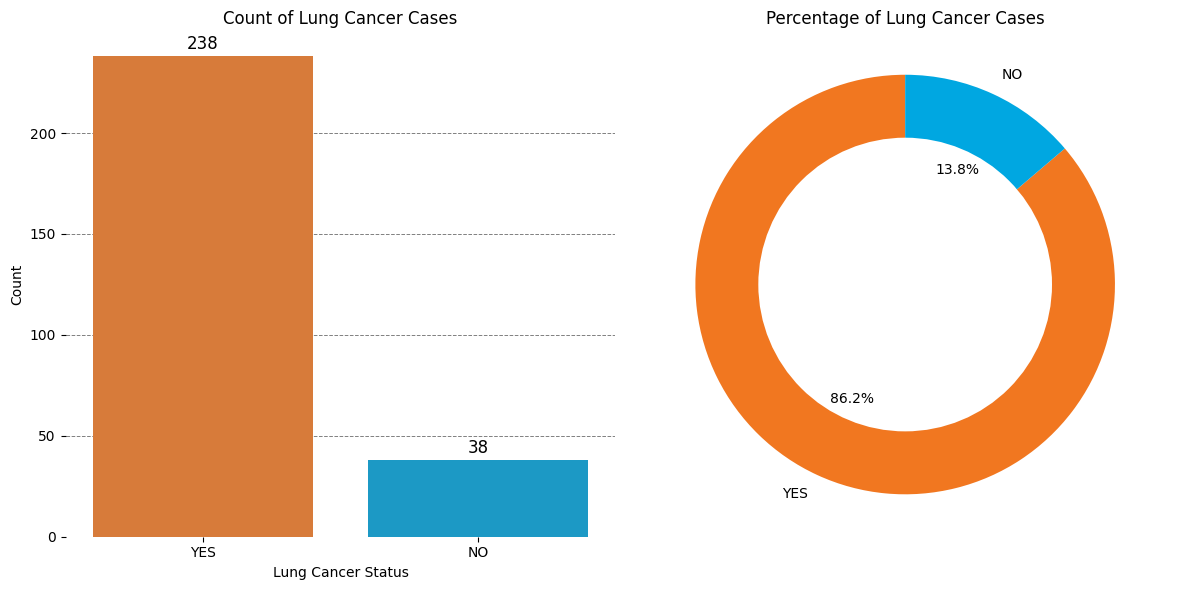

In [187]:
custom_palette = ['#F17720', '#00A7E1']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot for 'LUNG_CANCER'

sns.countplot(x='LUNG_CANCER', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Lung Cancer Cases')
axes[0].set_xlabel('Lung Cancer Status')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline',
                     color='black', fontsize=12,
                     xytext=(0, 5),
                     textcoords='offset points')

axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.despine(left=True, bottom=True)

# Donut chart for 'LUNG_CANCER'

lung_cancer_counts = df['LUNG_CANCER'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    lung_cancer_counts,
    labels=lung_cancer_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

axes[1].set_title('Percentage of Lung Cancer Cases')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

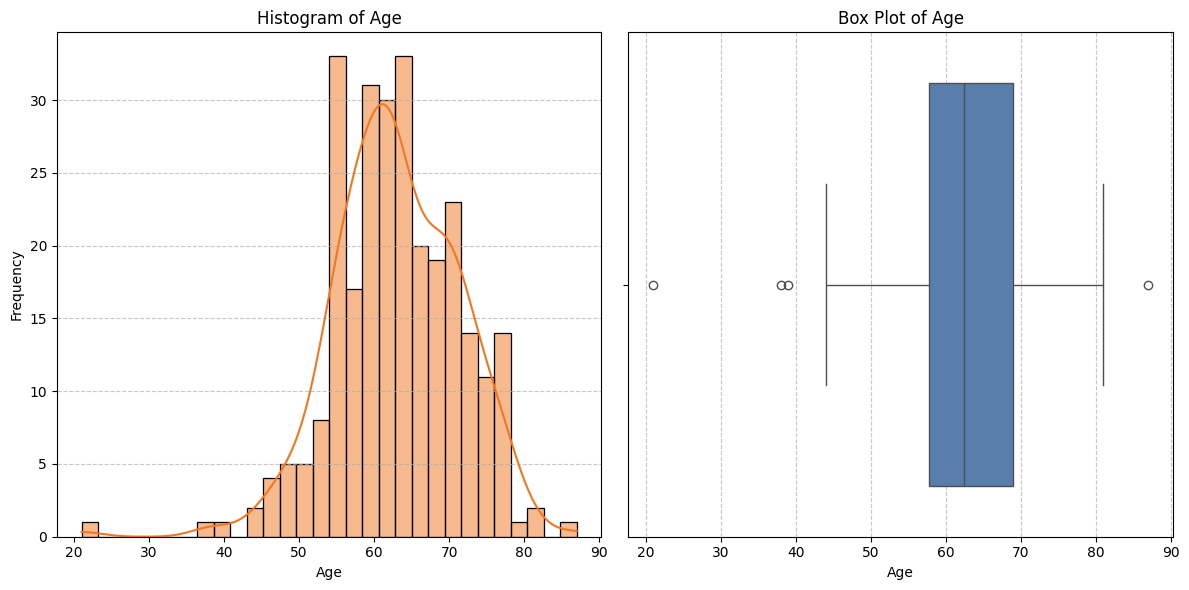

In [188]:
plt.figure(figsize=(12, 6))

# Histogram for 'AGE'

plt.subplot(1, 2, 1)
sns.histplot(df['AGE'], bins=30, color='#F17720', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Box plot for 'AGE'

plt.subplot(1, 2, 2)
sns.boxplot(x=df['AGE'], color='#4c7cba')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Age Distribution Insights

### Histogram
- Slightly right-skewed with most individuals aged **50–70 years**.
- Fewer participants are below **40 years**.

### Box Plot
- Median age: **~60 years**.
- IQR: **56–69 years**.
- A few outliers appear below **30 years**.


In [189]:
# Replacing numeric binary values with "YES" and "NO"

binary_columns = df.select_dtypes(include=['int64']).columns
df[binary_columns] = df[binary_columns].replace({2: "YES", 1: "NO"})

# Replacing "M" and "F" with "Male" and "Female" in "GENDER" column

df['GENDER'] = df['GENDER'].replace({'M': "Male", 'F': "Female"})

# Separating numerical and categorical features

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()



## Data Transformation Summary

- Binary values converted to **"YES"** and **"NO"**.  
- **GENDER** column standardized to **"Male"** and **"Female"**.  
- Enhances clarity and improves visualization in EDA.


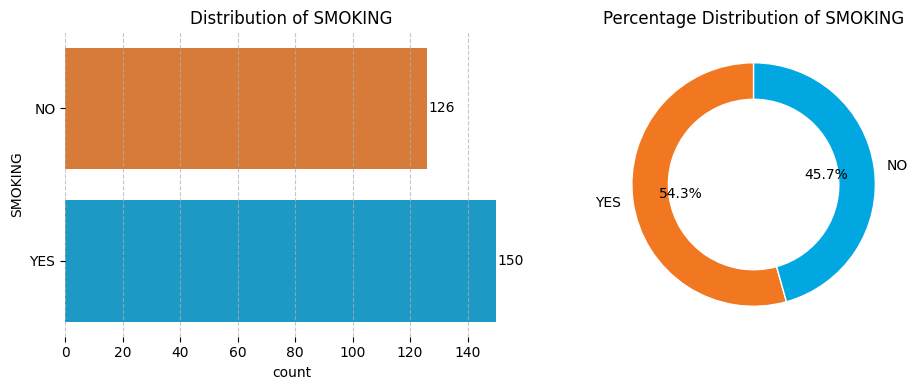

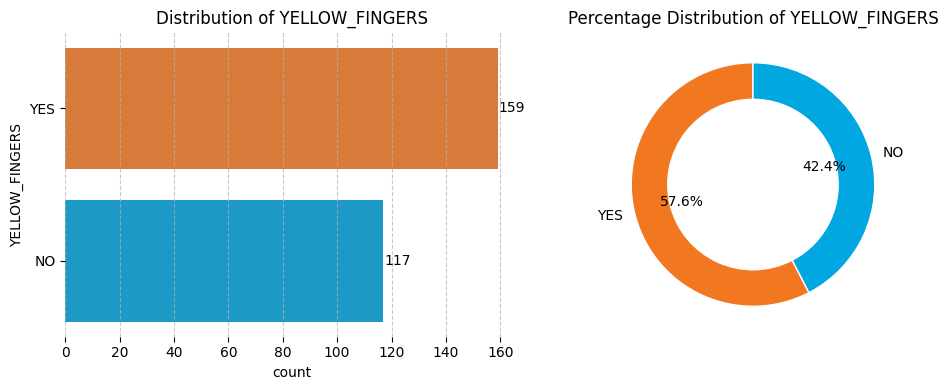

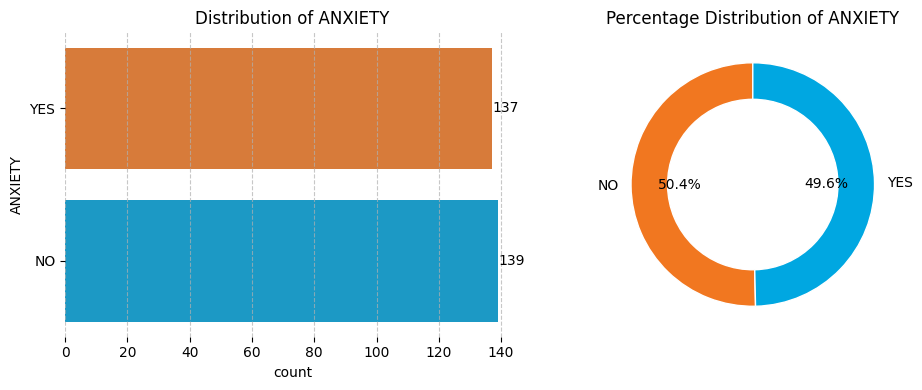

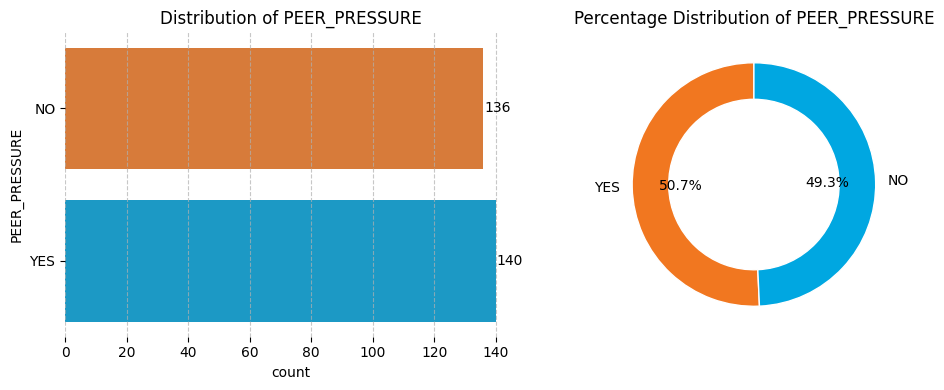

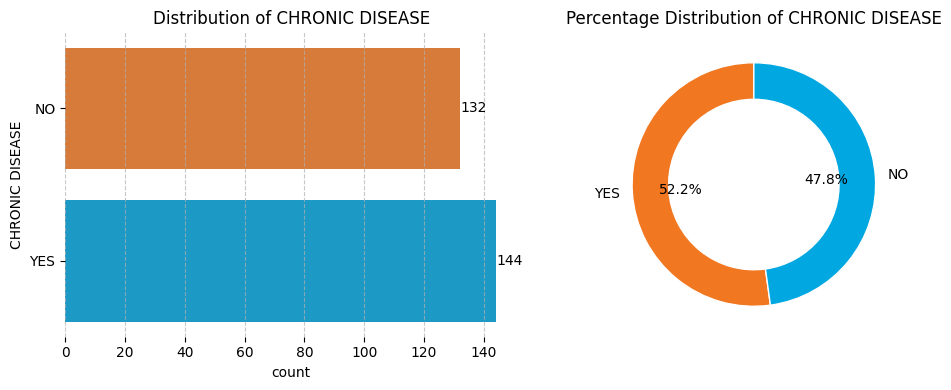

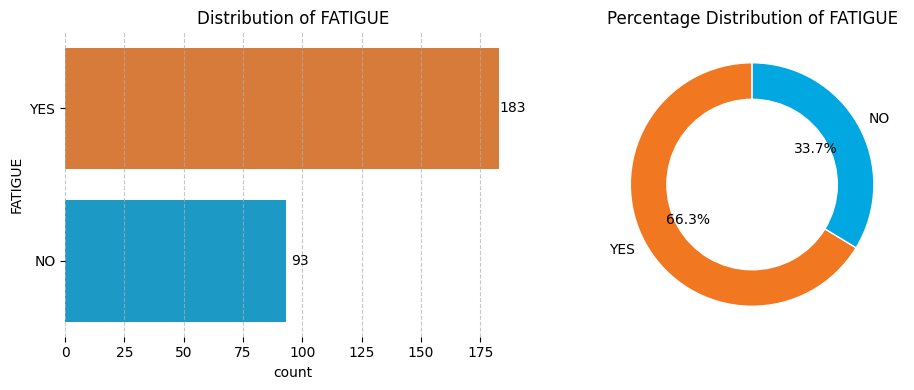

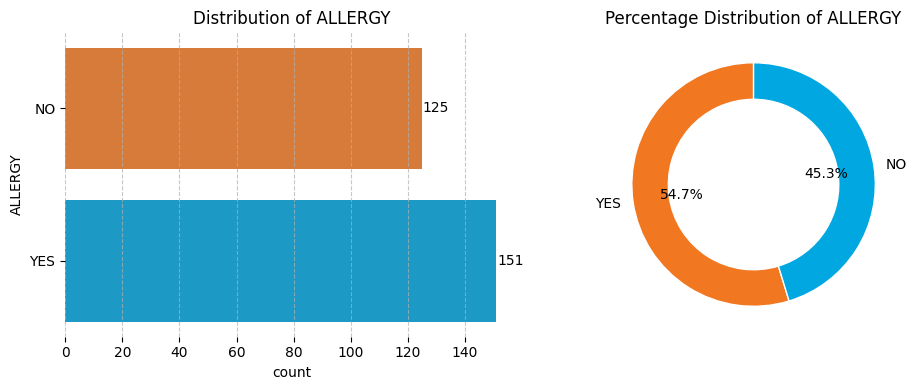

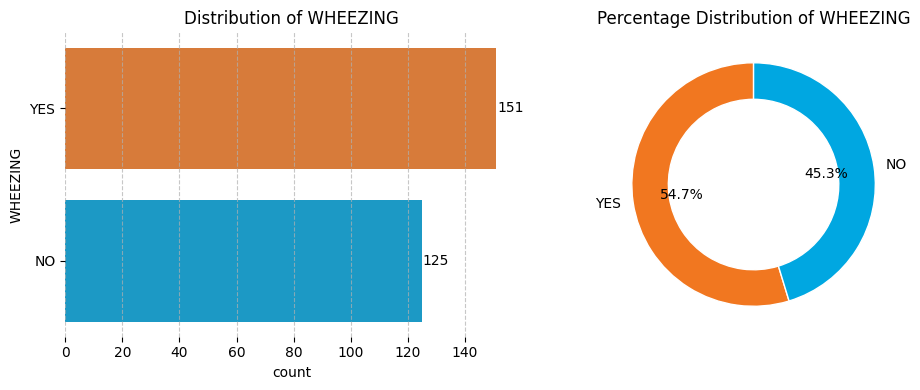

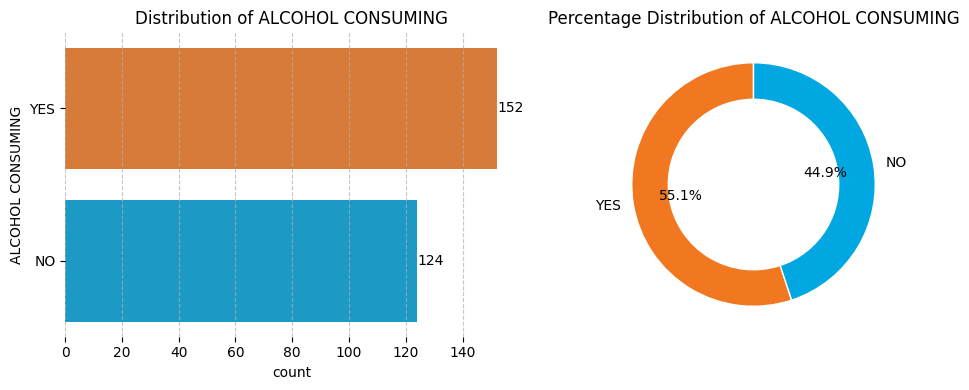

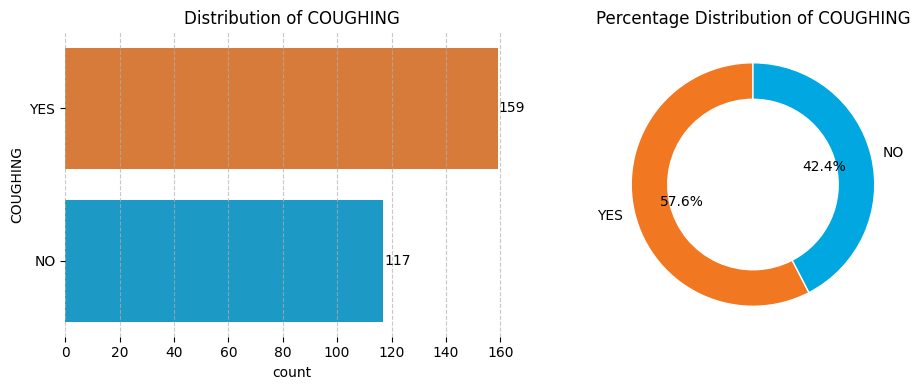

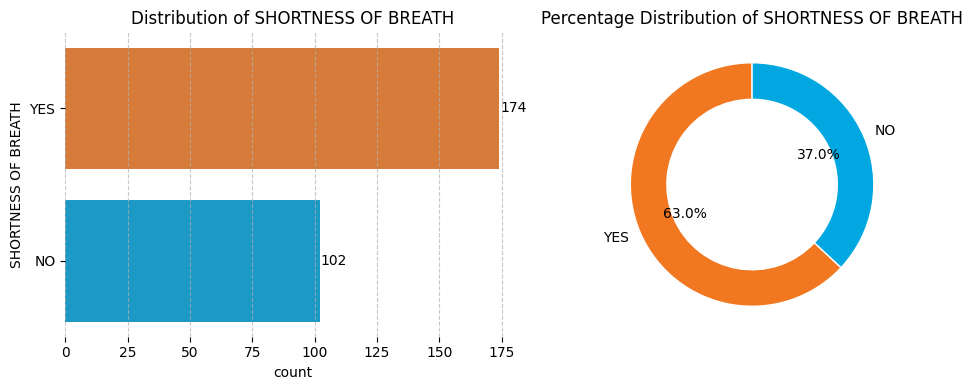

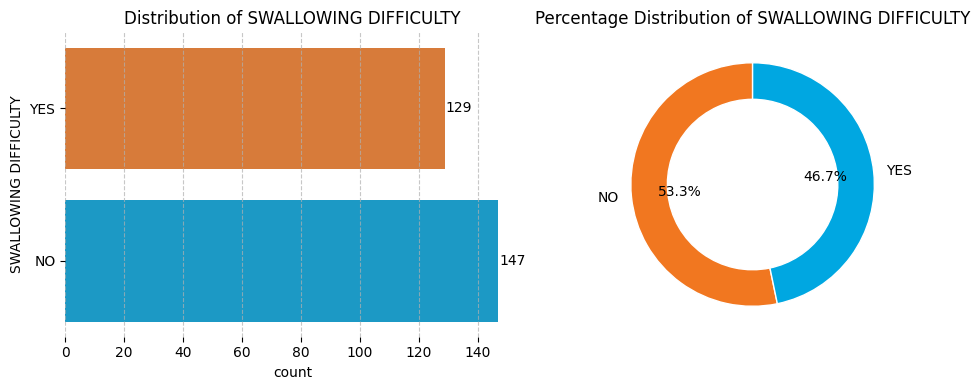

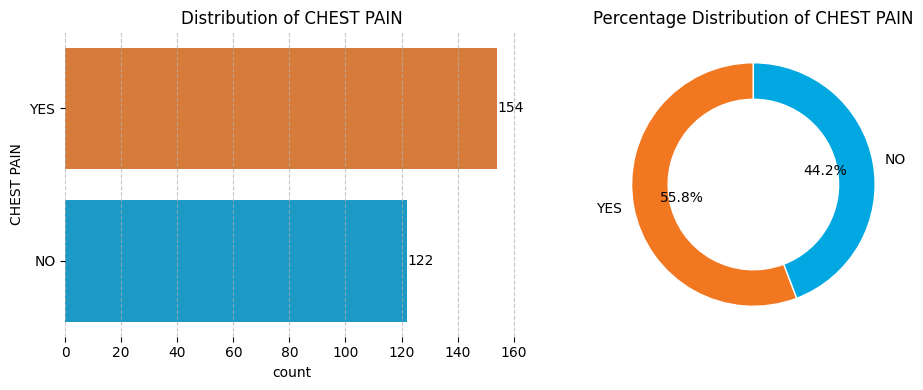

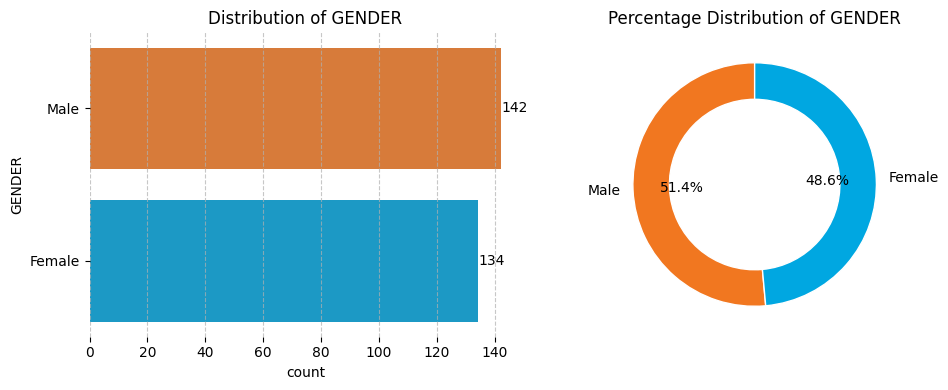

In [190]:
# Strip leading/trailing spaces

df.columns = df.columns.str.strip()

def plot_categorical_distribution_with_grid(column_name, data=df):
    plt.figure(figsize=(10, 4))

    # Counting plot with grid

    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette=['#F17720', '#00A7E1'])
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)
    ax.grid(visible=True, axis='x', linestyle='--', alpha=0.7)

    # Donut chart

    plt.subplot(1, 2, 2)
    counts = data[column_name].value_counts()
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#F17720', '#00A7E1'],
        wedgeprops=dict(width=0.3, edgecolor='w')
    )
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

# List of categorical features

categorical_features = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER'
]

for feature in categorical_features:
    plot_categorical_distribution_with_grid(feature, df)

## Categorical Feature Insights

- **SMOKING** – Slightly more "YES"; potential link to lung cancer.
- **YELLOW_FINGERS** – Similar to smoking; may indicate tobacco use.
- **ANXIETY** – Nearly balanced; may have indirect influence.
- **PEER_PRESSURE** – Mostly "NO"; limited impact.
- **CHRONIC DISEASE** – High "YES" prevalence; strong potential predictor.
- **FATIGUE** – Mostly "YES"; common symptom.
- **ALLERGY** – Balanced distribution.
- **WHEEZING** – Slightly more "YES"; suggests respiratory issues.
- **ALCOHOL CONSUMING** – Balanced; no strong trend.
- **COUGHING** – Mostly "YES"; frequent symptom.
- **SHORTNESS OF BREATH** – High "YES" prevalence; key indicator.
- **SWALLOWING DIFFICULTY** – Mostly "NO"; less common symptom.
- **CHEST PAIN** – Balanced distribution.
- **GENDER** – Male majority.

### General Observations
- Strong "YES" prevalence in **SMOKING, WHEEZING, COUGHING, SHORTNESS OF BREATH** – likely key indicators.  
- **FATIGUE** and **CHRONIC DISEASE** also appear significant.  
- Balanced features (**PEER_PRESSURE, ALLERGY, CHEST PAIN**) may have weaker direct impact.


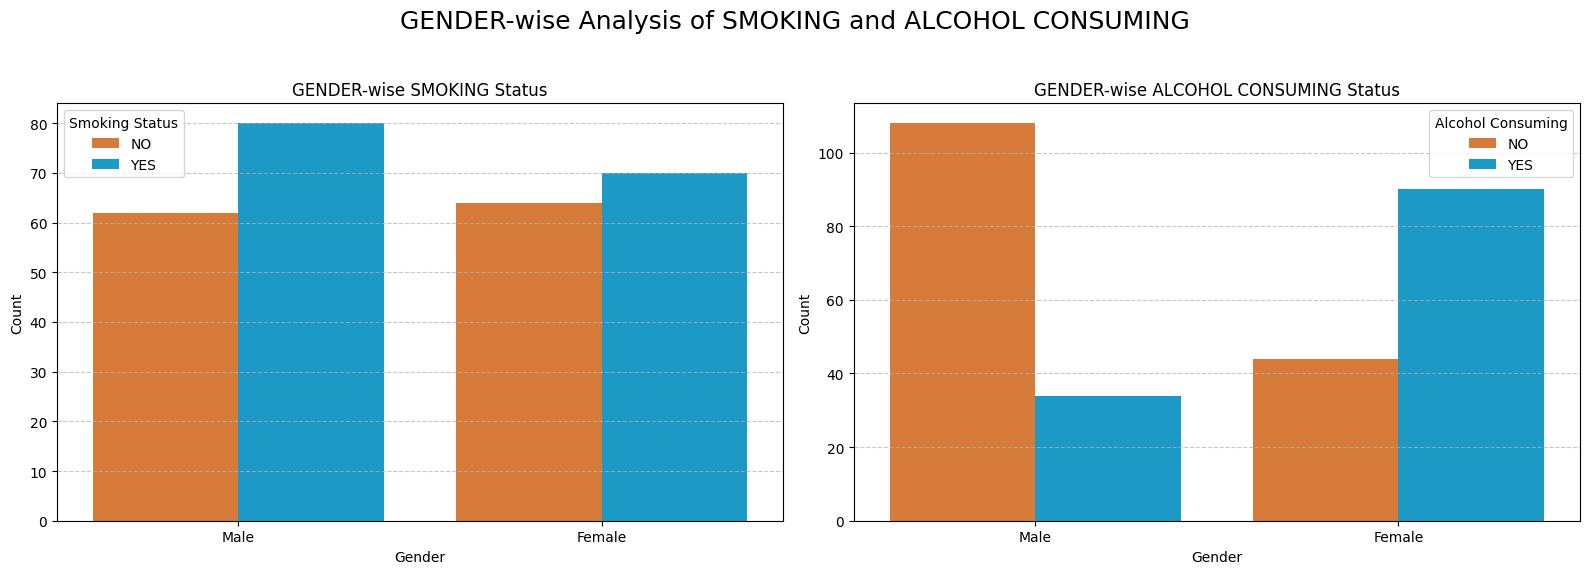

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("GENDER-wise Analysis of SMOKING and ALCOHOL CONSUMING", fontsize=18)

# GENDER vs SMOKING

sns.countplot(data=df, x='GENDER', hue='SMOKING', ax=axes[0], palette=custom_palette)
axes[0].set_title("GENDER-wise SMOKING Status")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].legend(title='Smoking Status', labels=['NO', 'YES'])
axes[0].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# GENDER vs ALCOHOL CONSUMING

sns.countplot(data=df, x='GENDER', hue='ALCOHOL CONSUMING', ax=axes[1], palette=custom_palette)
axes[1].set_title("GENDER-wise ALCOHOL CONSUMING Status")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
axes[1].legend(title='Alcohol Consuming', labels=['NO', 'YES'])
axes[1].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Gender-wise Analysis of Smoking & Alcohol Consumption

### Smoking
- **Observation**: Males show a significantly higher count of smokers ("YES") than females.  
- **Insight**: Smoking prevalence is notably higher among males.

### Alcohol Consumption
- **Observation**: Males also report higher alcohol consumption ("YES"), while females are more likely to respond "NO".  
- **Insight**: Alcohol use is more common among males, indicating possible lifestyle differences.

### Key Takeaway
Gender differences are evident in both smoking and alcohol consumption behaviors.


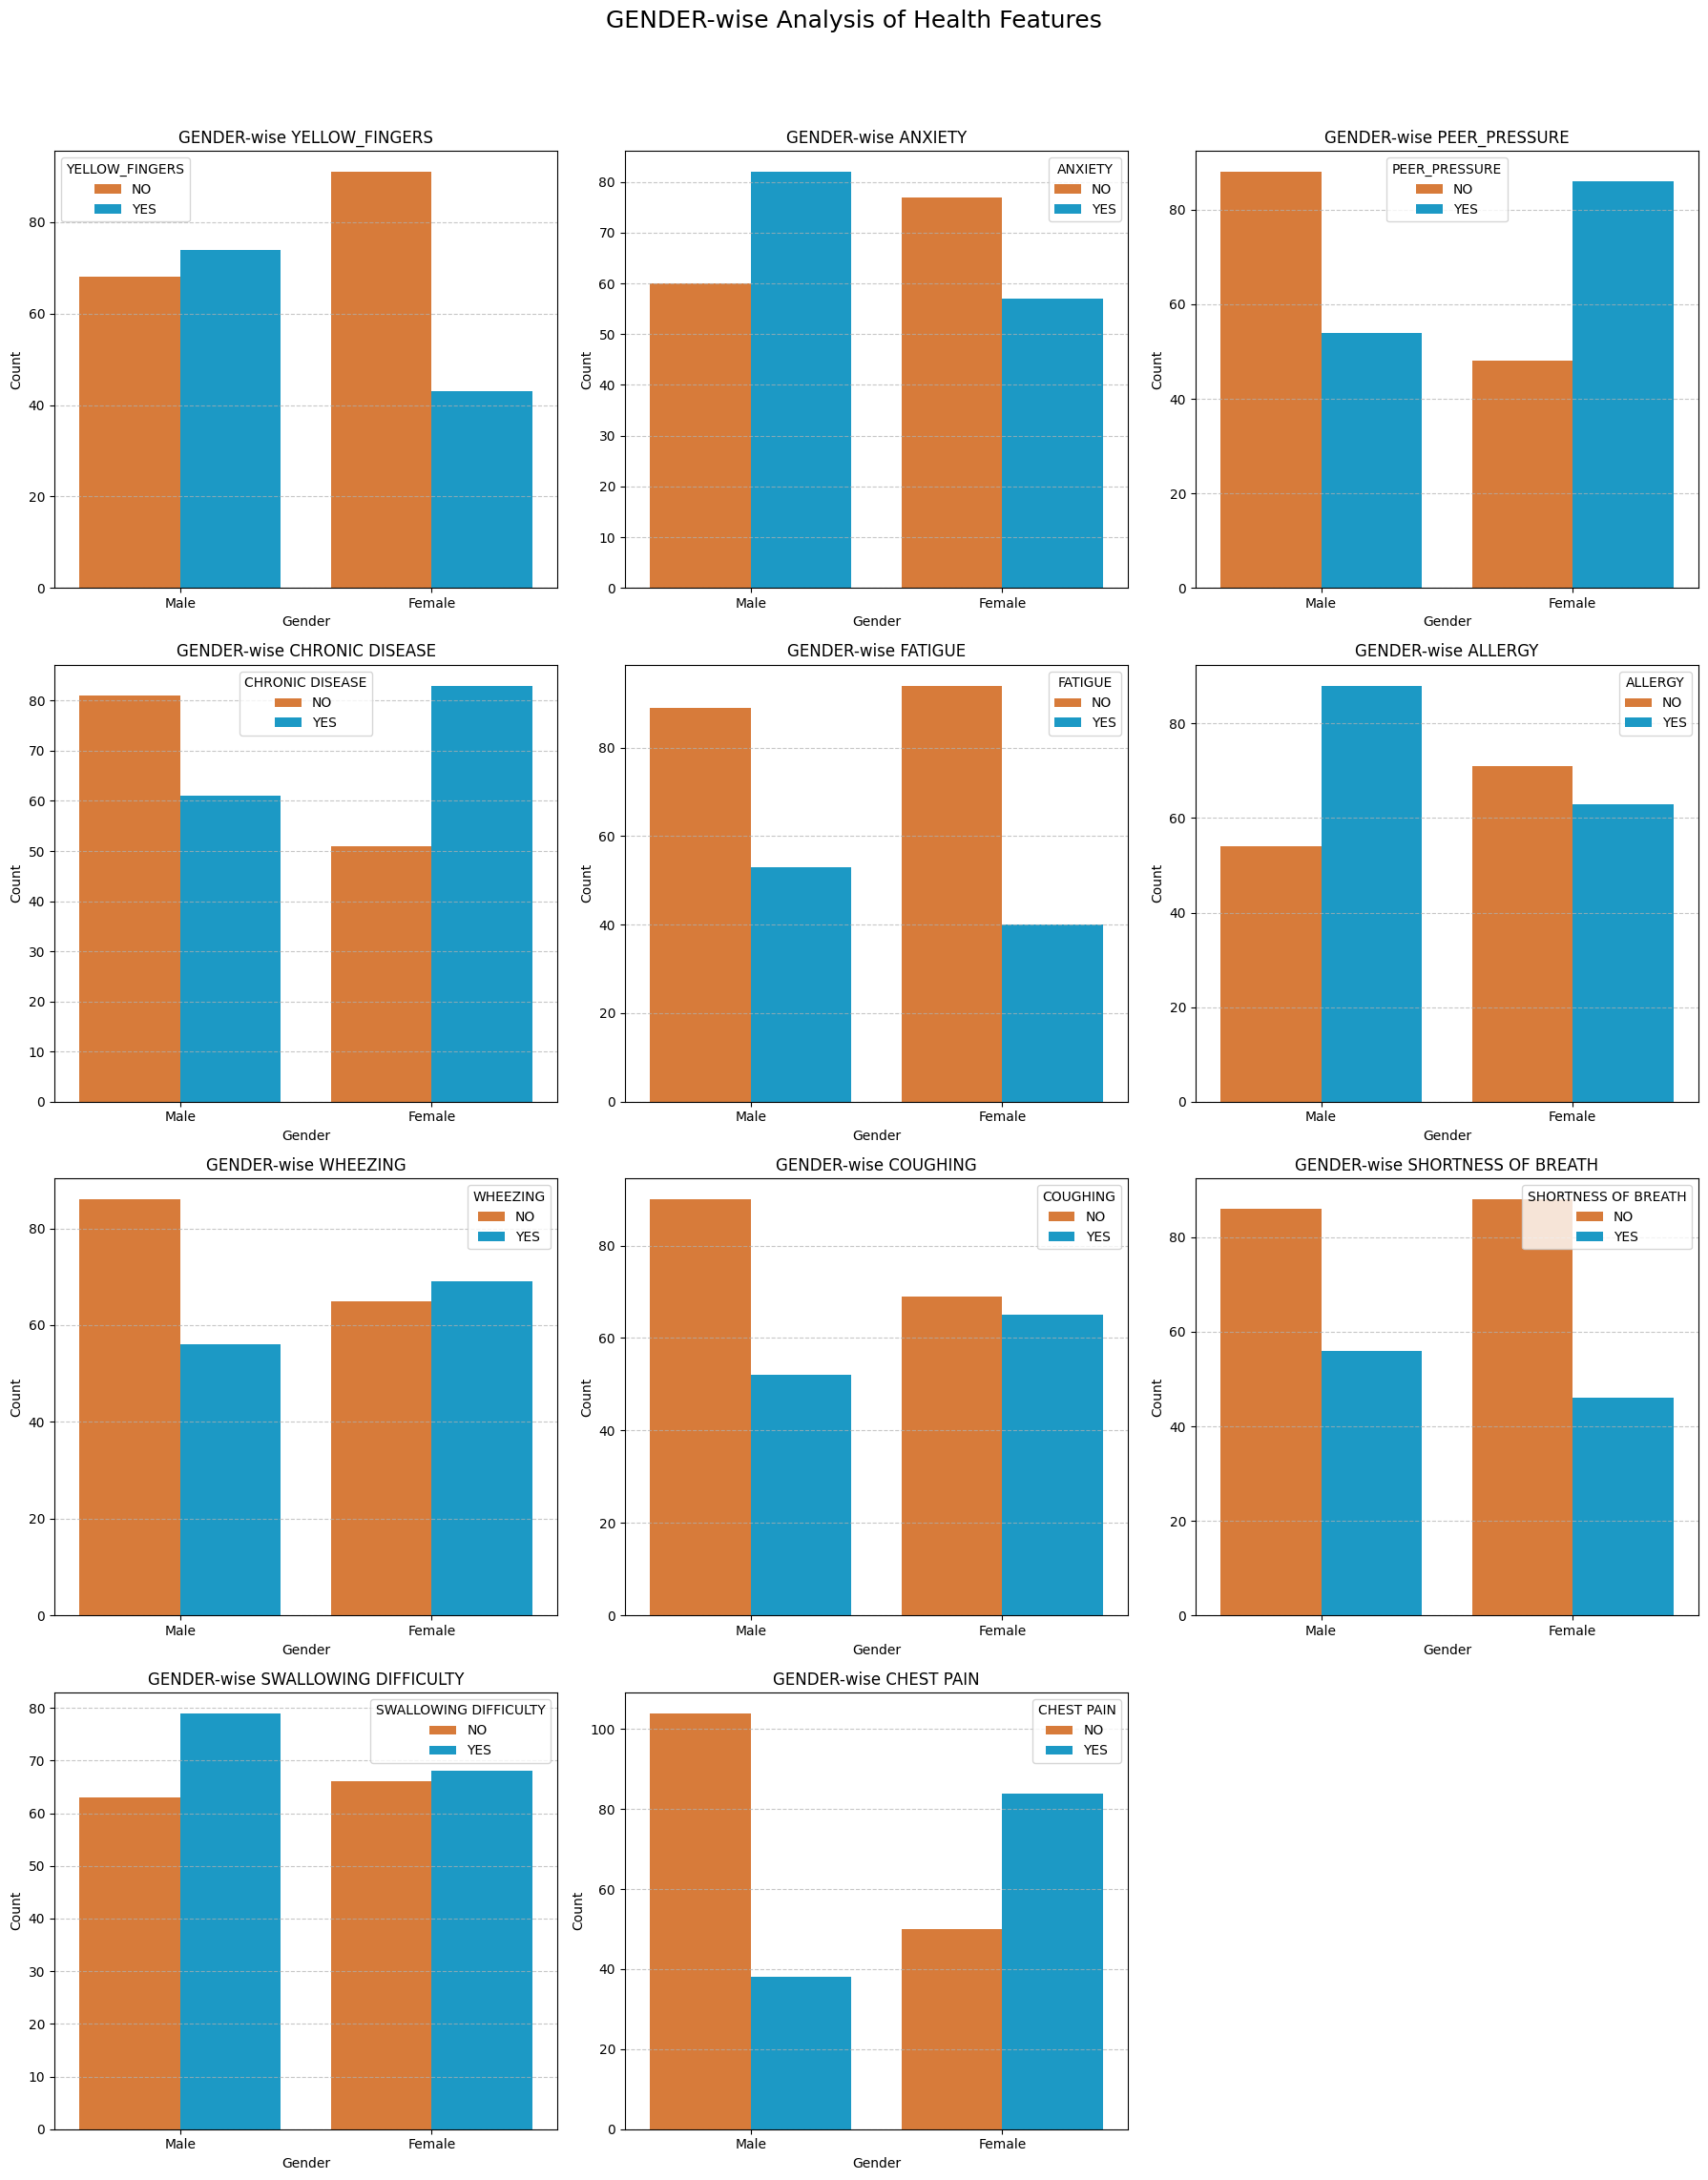

In [192]:
df.columns = df.columns.str.strip()

# Features for analysis

features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

num_features = len(features)
rows = (num_features + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))
fig.suptitle("GENDER-wise Analysis of Health Features", fontsize=18)
axes = axes.flatten()

# Custom palette

custom_palette = ['#F17720', '#00A7E1']

for i, feature in enumerate(features):
    sns.countplot(data=df, x='GENDER', hue=feature, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"GENDER-wise {feature}")
    axes[i].set_xlabel("Gender")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=feature, labels=['NO', 'YES'])
    axes[i].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Gender-wise Analysis of Health Features

### Behavioral & Symptom Patterns
- **Yellow Fingers** – Higher prevalence in males, likely linked to smoking.  
- **Anxiety & Peer Pressure** – Balanced across genders.  
- **Chronic Disease** – Slightly higher "YES" in females.  
- **Fatigue** – More common in females, possibly due to perception or health differences.

### Respiratory & Health Symptoms
- **Wheezing & Coughing** – Slightly higher in males, consistent with smoking trends.  
- **Shortness of Breath** – Nearly equal, with a slight female majority.  
- **Swallowing Difficulty** – No major gender difference.  
- **Chest Pain** – More "YES" in females; males report "NO" more frequently.

### General Trends
- Smoking-related features (yellow fingers, coughing, wheezing) are more male-associated.  
- Fatigue, chest pain, and chronic disease appear more prevalent among females.


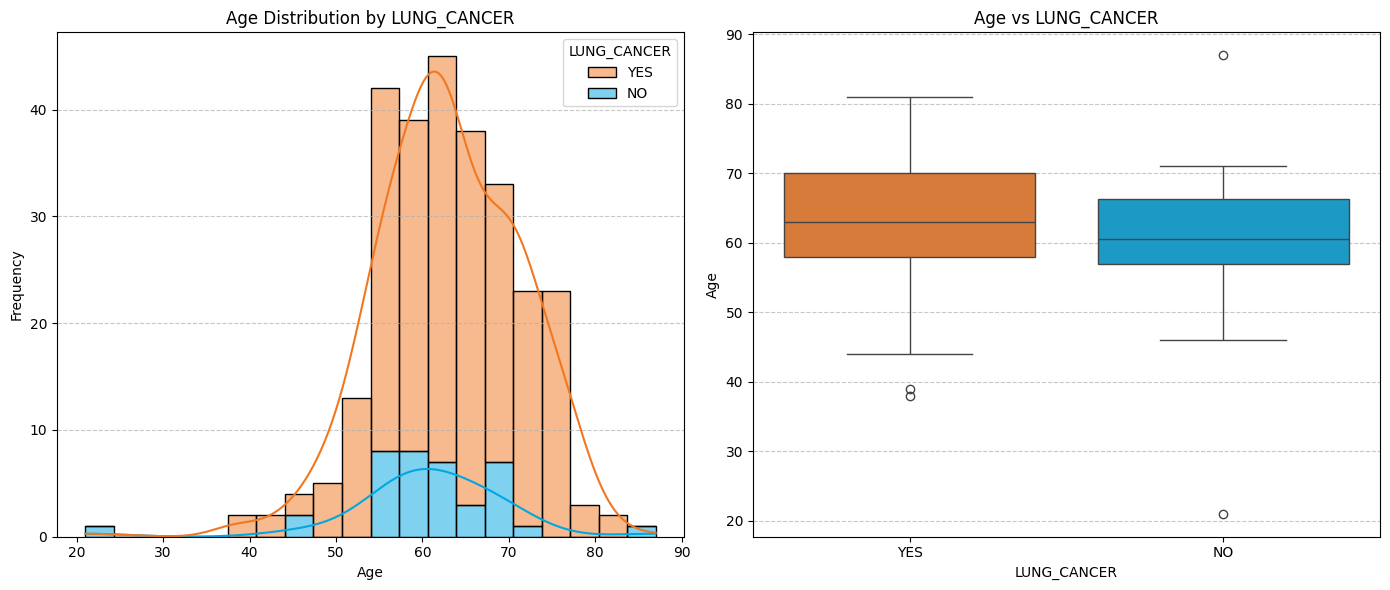

In [193]:
# Adding grid to AGE distribution analysis by LUNG_CANCER

plt.figure(figsize=(14, 6))

# Histogram for AGE by LUNG_CANCER

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', kde=True, palette=custom_palette, bins=20, multiple='stack')
plt.title('Age Distribution by LUNG_CANCER')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Box plot for AGE by LUNG_CANCER

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='LUNG_CANCER', y='AGE', palette=custom_palette)
plt.title('Age vs LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Age Distribution by Lung Cancer Status

### Histogram Insights
- **LUNG_CANCER = YES**
  - Majority fall within **50–70 years**.
  - Clear peak around **60 years**, suggesting increased prevalence in this range.
- **LUNG_CANCER = NO**
  - Age distribution is more spread out.
  - Fewer individuals overall compared to the YES group.

### Box Plot Insights
- **LUNG_CANCER = YES**
  - Median age: **~65 years**.
  - IQR: **60–70 years** (indicating a concentration in older age).
- **LUNG_CANCER = NO**
  - Median age: **~55 years**.
  - IQR: **40–70 years**, showing a wider spread.
- **Outliers**
  - Younger individuals (<40) with lung cancer.
  - Older individuals (>70) without lung cancer.

### Key Observations
- **Age as a Risk Factor:** Higher lung cancer prevalence observed among older adults, particularly around **60–70 years**.
- **Broader Age Range for Non-Cases:** Indicates additional factors beyond age may influence the absence of disease.


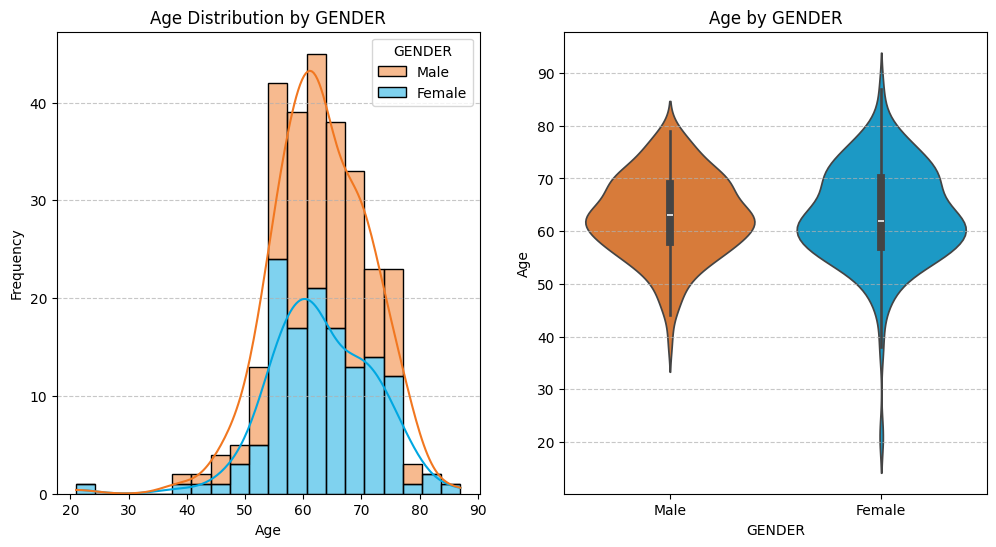

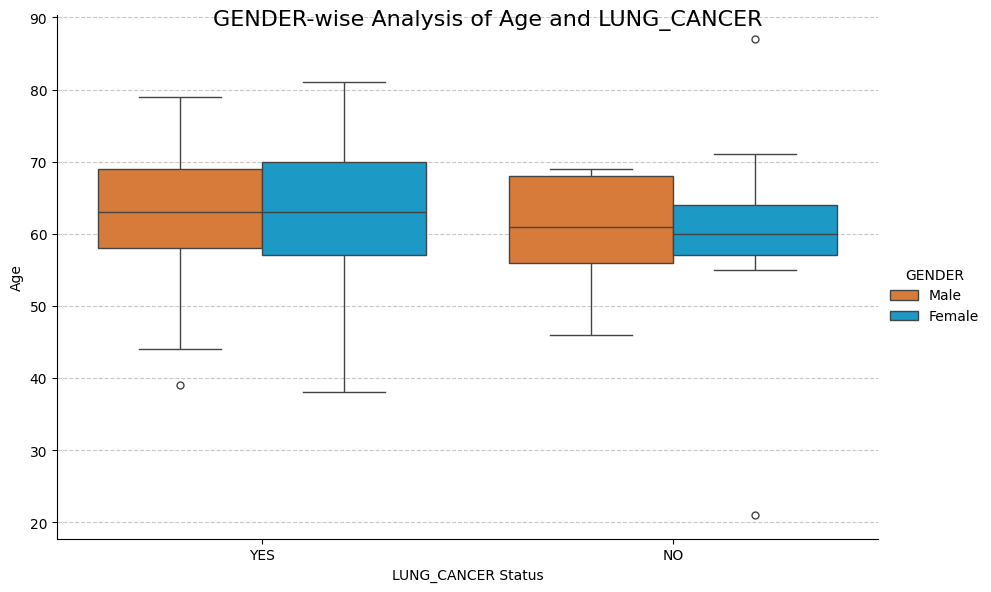

In [194]:
plt.figure(figsize=(12, 6))

# Histogram for AGE by GENDER

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', hue='GENDER', kde=True, palette=custom_palette, bins=20, multiple='stack')
plt.title('Age Distribution by GENDER')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Violin plot for AGE by GENDER

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='GENDER', y='AGE', palette=custom_palette)
plt.title('Age by GENDER')
plt.xlabel('GENDER')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Catplot for GENDER-wise AGE effects on LUNG_CANCER
g = sns.catplot(
    data=df,
    x='LUNG_CANCER',
    y='AGE',
    hue='GENDER',
    kind='box',
    height=6,
    aspect=1.5,
    palette=custom_palette
)

g.set_axis_labels("LUNG_CANCER Status", "Age")
g.set_titles("GENDER-wise Age Effects on LUNG_CANCER")
g.fig.suptitle("GENDER-wise Analysis of Age and LUNG_CANCER", fontsize=16)

for ax in g.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.show()

## Gender-wise Analysis of Age and Lung Cancer

### Age Distribution by Gender (Histogram)
- **Males** dominate most age groups, especially between **50–70 years**.
- **Females** have lower overall representation but show a slightly wider spread in older age groups (**70+ years**).

### Age by Gender (Violin Plot)
- Median age for both genders: **~60 years**.
- **Males** – More concentrated distribution; fewer outliers.
- **Females** – Slightly wider spread with younger and older outliers.

### Gender-wise Age Effects on Lung Cancer (Box Plot)

#### Lung Cancer Status: YES
- Median Age:  
  - Males – **~65 years**  
  - Females – **~60 years**
- IQR is similar across genders, indicating lung cancer cases cluster in a comparable age range.

#### Lung Cancer Status: NO
- Females without lung cancer tend to be slightly older than males in the same category.
- Broader age distribution suggests additional non-age-related protective factors.

### Key Observations
- **Lung Cancer Prevalence:** Age **50–70 years** is the critical risk window for both genders.  
- **Gender Differences:**  
  - Males show higher risk at slightly older ages (~65 years).  
  - Females display greater variability in age distribution despite fewer cases.  
- **Correlation:** Older age remains a strong predictor, with subtle gender-related patterns.


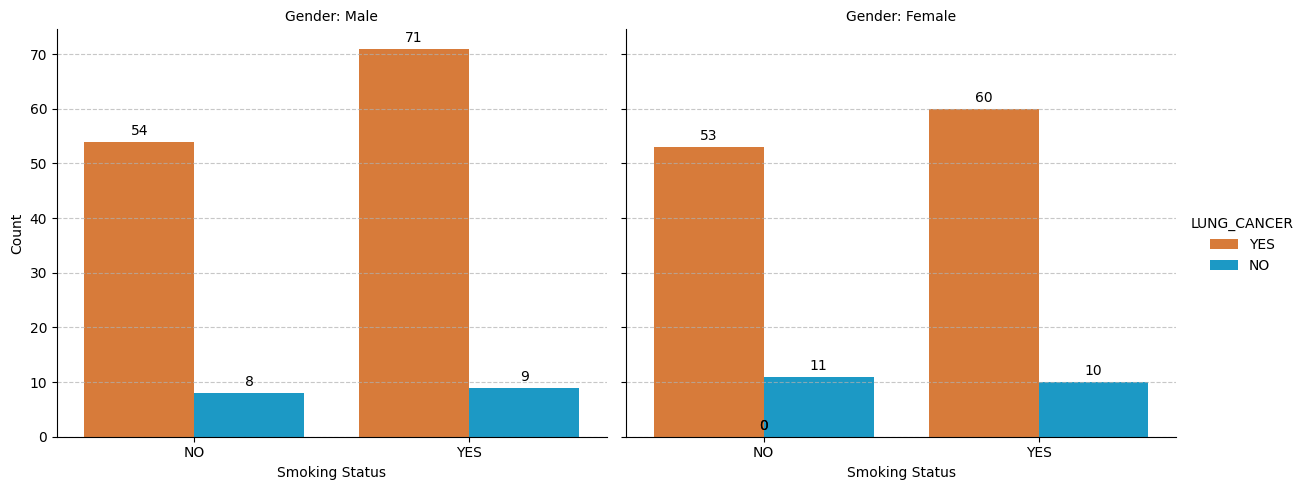

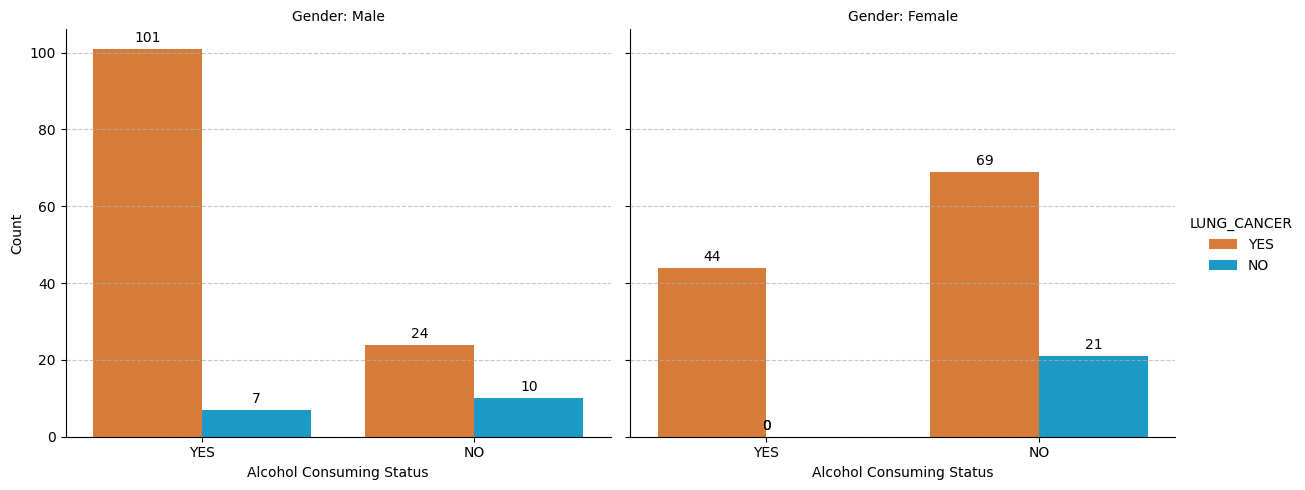

In [195]:
# SMOKING and ALCOHOL CONSUMING vs LUNG_CANCER

# Catplot for SMOKING vs LUNG_CANCER

g_smoking = sns.catplot(
    data=df,
    x='SMOKING',
    hue='LUNG_CANCER',
    col='GENDER',
    kind='count',
    height=5,
    aspect=1.2,
    palette=custom_palette
)

g_smoking.set_axis_labels("Smoking Status", "Count")
g_smoking.set_titles("Gender: {col_name}")

for ax in g_smoking.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        if not pd.isna(p.get_height()):
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='baseline',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

# Catplot for ALCOHOL CONSUMING vs LUNG_CANCER

g_alcohol = sns.catplot(
    data=df,
    x='ALCOHOL CONSUMING',
    hue='LUNG_CANCER',
    col='GENDER',
    kind='count',
    height=5,
    aspect=1.2,
    palette=custom_palette
)

g_alcohol.set_axis_labels("Alcohol Consuming Status", "Count")
g_alcohol.set_titles("Gender: {col_name}")

for ax in g_alcohol.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        if not pd.isna(p.get_height()):
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='baseline',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

plt.show()


## Smoking and Alcohol Consumption vs Lung Cancer

### Smoking vs Lung Cancer
- **Males**
  - Smokers (SMOKING = YES) show **71** lung cancer cases vs **54** in non-smokers.
  - Strong association between smoking and lung cancer.
- **Females**
  - Smokers account for **60** lung cancer cases vs **53** in non-smokers.
  - Association is present but less pronounced compared to males.

### Alcohol Consumption vs Lung Cancer
- **Males**
  - Alcohol consumers (ALCOHOL CONSUMING = YES): **101** lung cancer cases.
  - Non-consumers: **24** cases.
  - Indicates strong correlation between alcohol use and lung cancer.
- **Females**
  - Alcohol consumers: **69** lung cancer cases.
  - Non-consumers: **44** cases.
  - Correlation exists but is less intense than in males.

### Key Observations
- **Smoking:** Clear link with lung cancer across both genders; slightly stronger among males.
- **Alcohol Consumption:** Higher prevalence of lung cancer among alcohol consumers, with males showing a more pronounced effect.
- **Gender Differences:** Both risk factors (smoking and alcohol) have stronger associations with lung cancer in males.


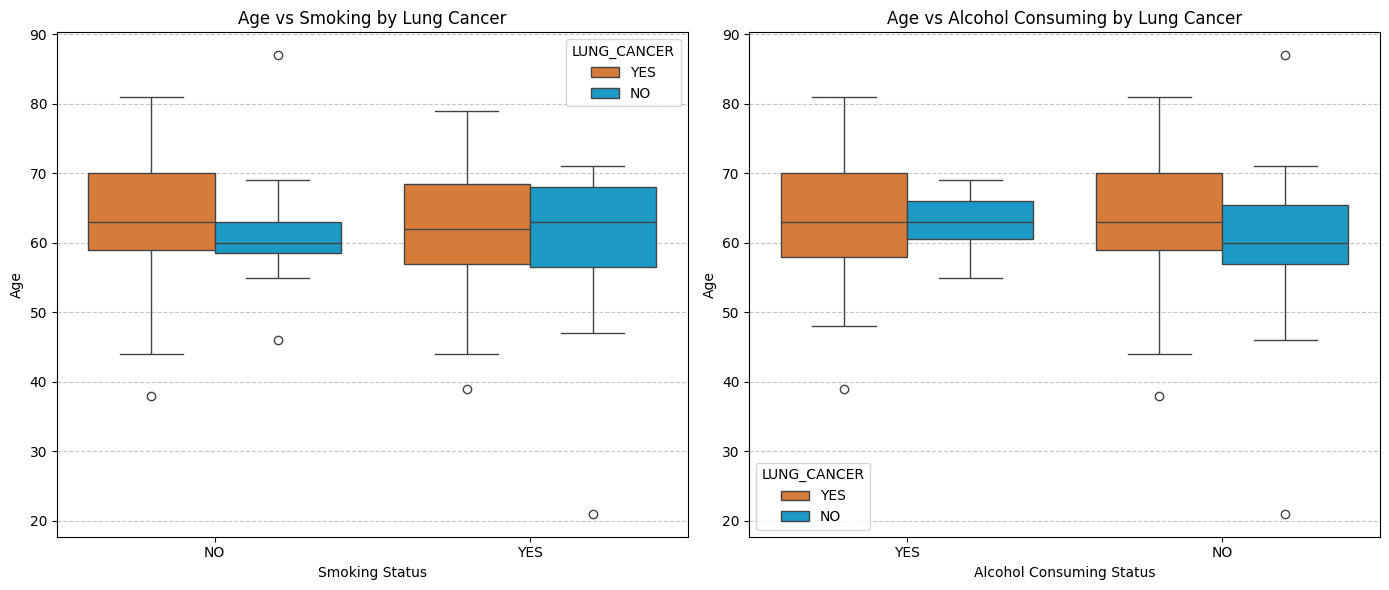

In [196]:
plt.figure(figsize=(14, 6))

# AGE vs SMOKING by LUNG_CANCER

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='SMOKING', y='AGE', hue='LUNG_CANCER', palette=custom_palette)
plt.title('Age vs Smoking by Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# AGE vs ALCOHOL CONSUMING by LUNG_CANCER

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='ALCOHOL CONSUMING', y='AGE', hue='LUNG_CANCER', palette=custom_palette)
plt.title('Age vs Alcohol Consuming by Lung Cancer')
plt.xlabel('Alcohol Consuming Status')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Observational Insights from Visualizations

### 1. Age vs Smoking by Lung Cancer

#### Non-Smokers (SMOKING = NO)
- Individuals **without lung cancer** tend to be younger, median age slightly **below 60 years**.
- Individuals **with lung cancer** are generally older, peaking around **65–70 years**.

#### Smokers (SMOKING = YES)
- Smokers with lung cancer: Median age **~65 years**.
- Smokers without lung cancer: Lower median age, but still primarily middle-aged and older adults.
- A few younger outliers are present among smokers with lung cancer.

**Key Insight:** Smoking is strongly linked to lung cancer, particularly in older adults, suggesting cumulative exposure significantly increases risk.

---

### 2. Age vs Alcohol Consumption by Lung Cancer

#### Non-Alcohol Consumers (ALCOHOL CONSUMING = NO)
- Non-consumers without lung cancer: Median age **< 60 years**.
- Non-consumers with lung cancer: Older age distribution, peaking **65–70 years**.

#### Alcohol Consumers (ALCOHOL CONSUMING = YES)
- Alcohol consumers with lung cancer: Median age **~65 years**.
- Alcohol consumers without lung cancer: Lower and more varied age distribution.
- Age range is broader overall, but older consumers show higher lung cancer prevalence.

**Key Insight:** Alcohol consumption has a weaker correlation than smoking but still shows increased risk among older individuals.

---

### Overall Observations
- **Smoking:** Strong correlation with lung cancer, especially in older adults due to cumulative effects.  
- **Alcohol Consumption:** Moderate correlation; may act as a co-factor alongside smoking or other health risks.  
- **Non-Smokers & Non-Alcohol Consumers:** Younger median ages and lower prevalence of lung cancer, suggesting protective effects.


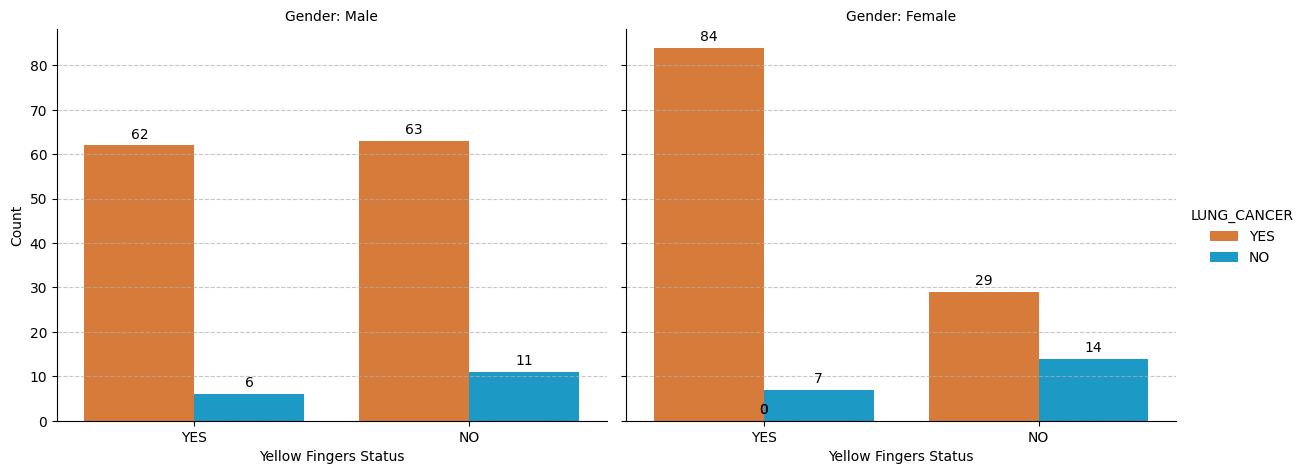

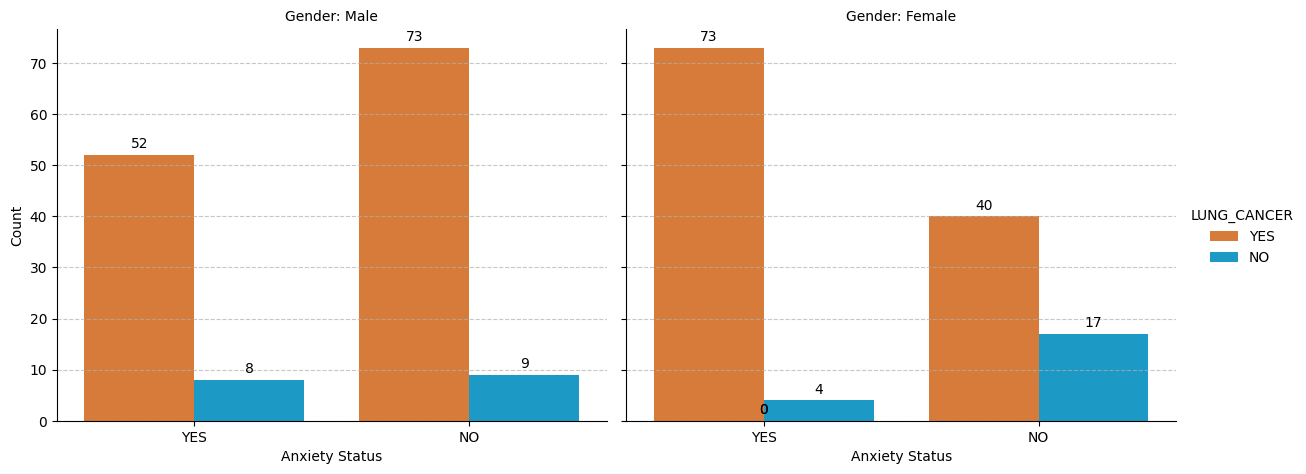

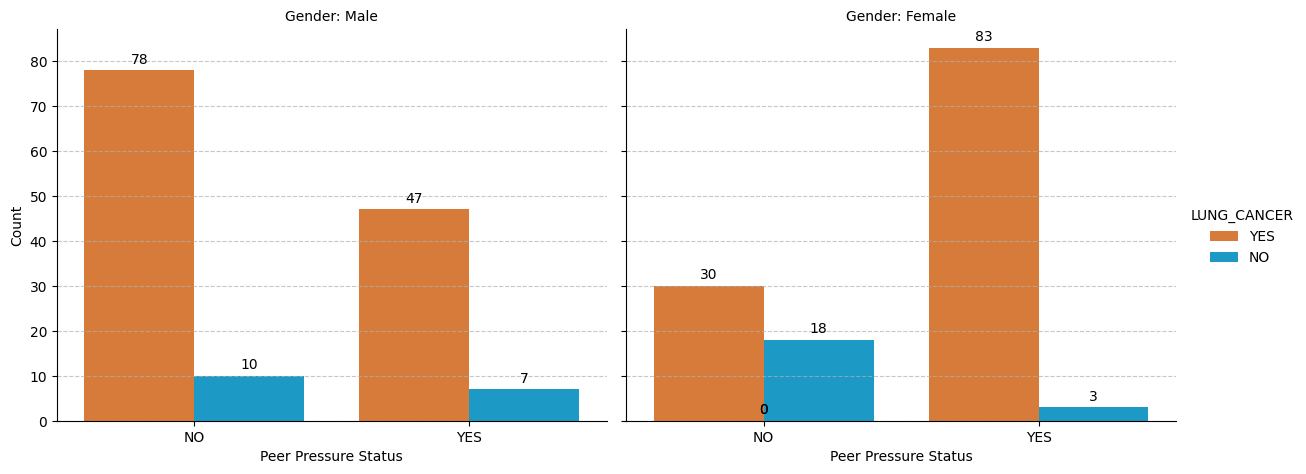

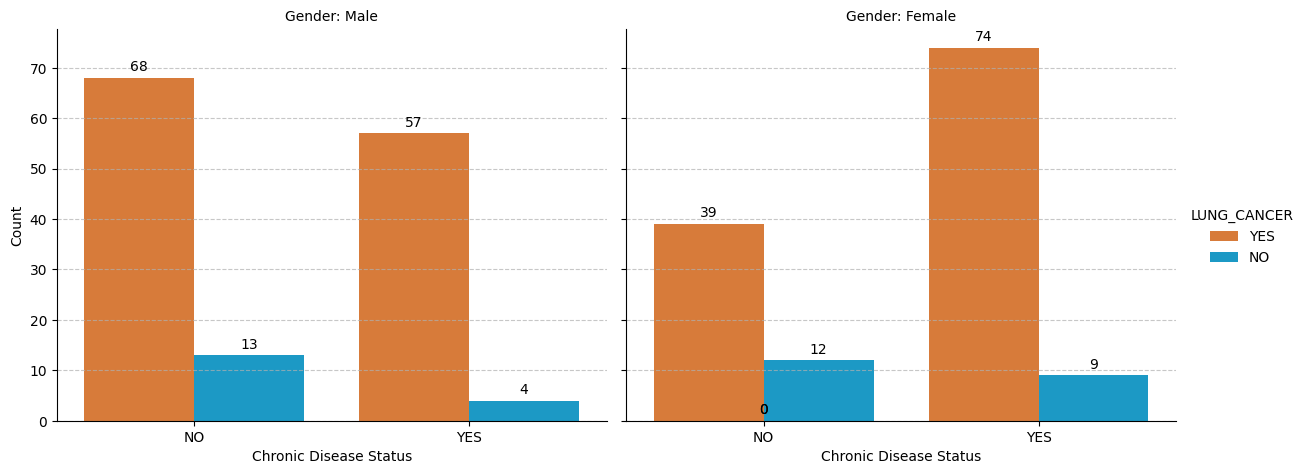

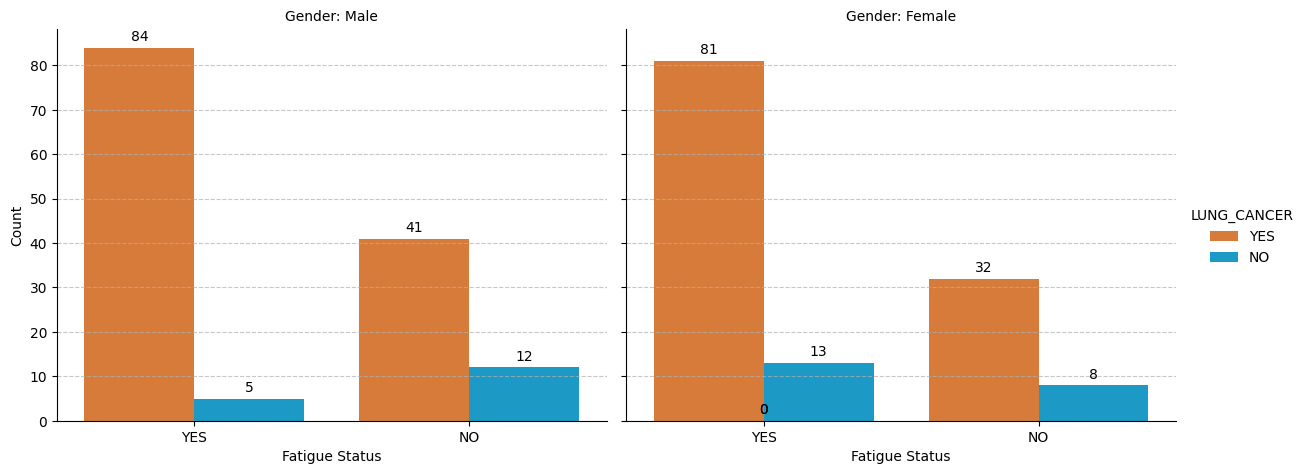

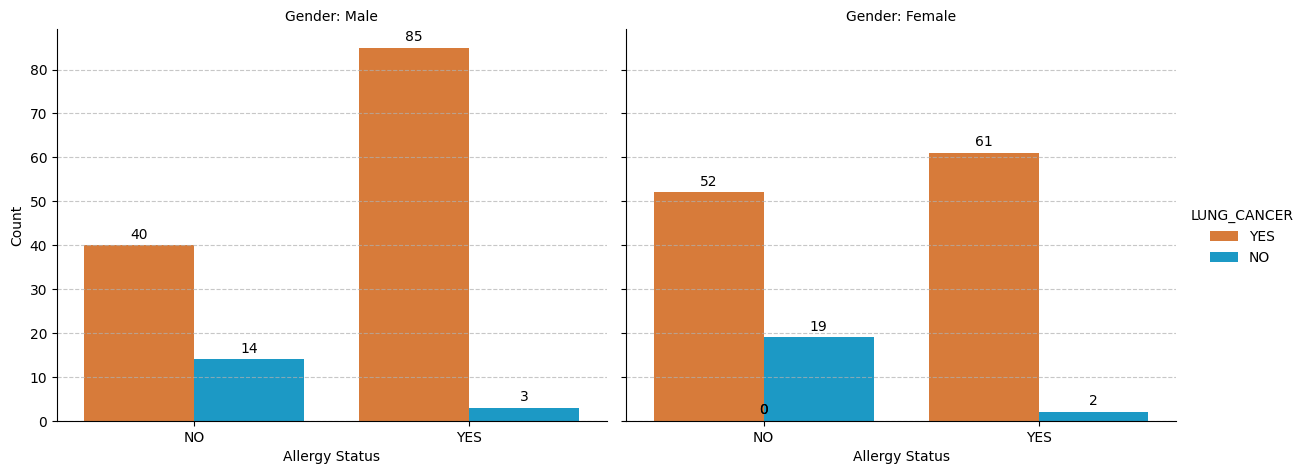

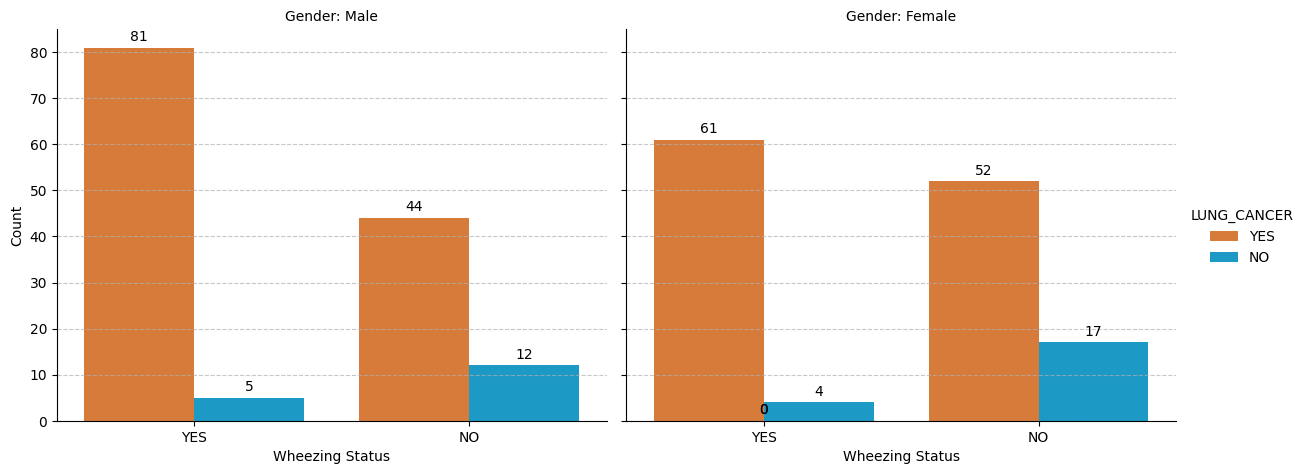

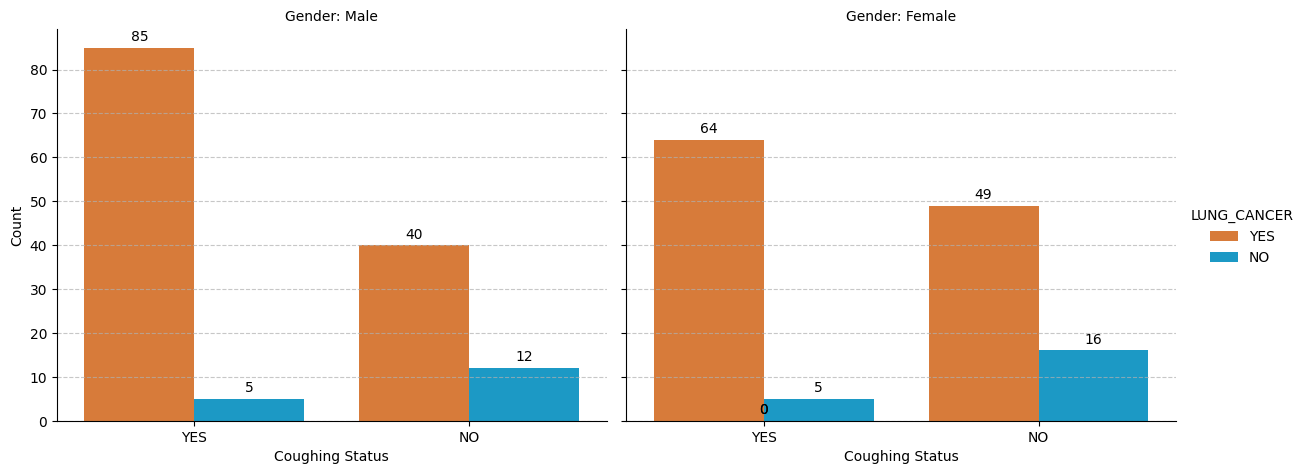

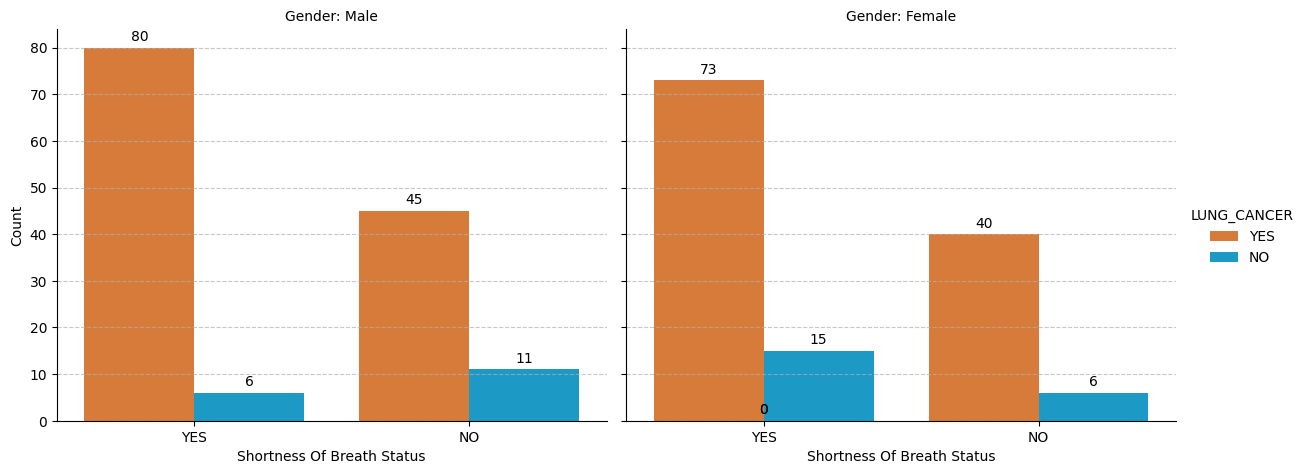

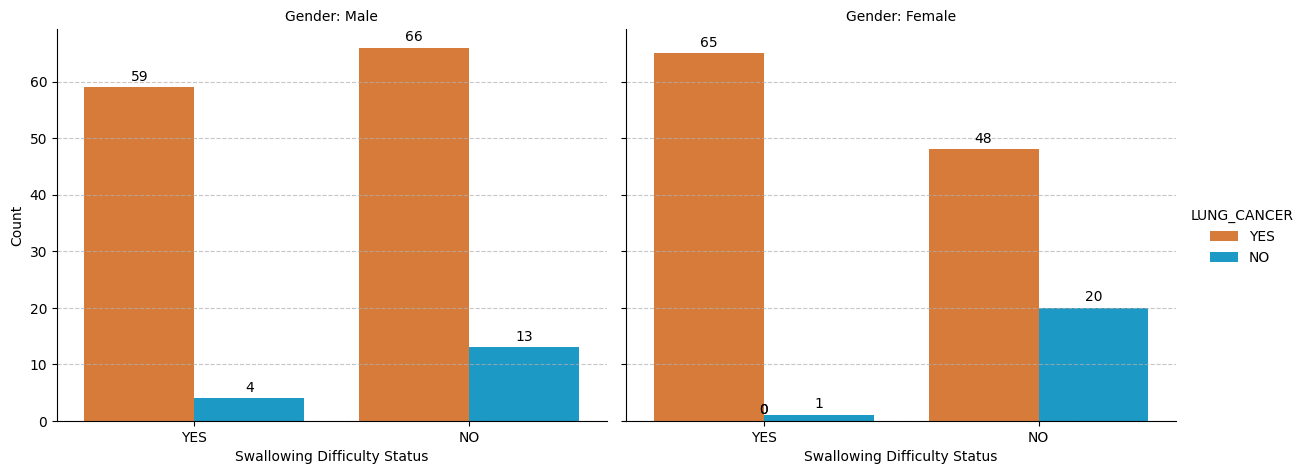

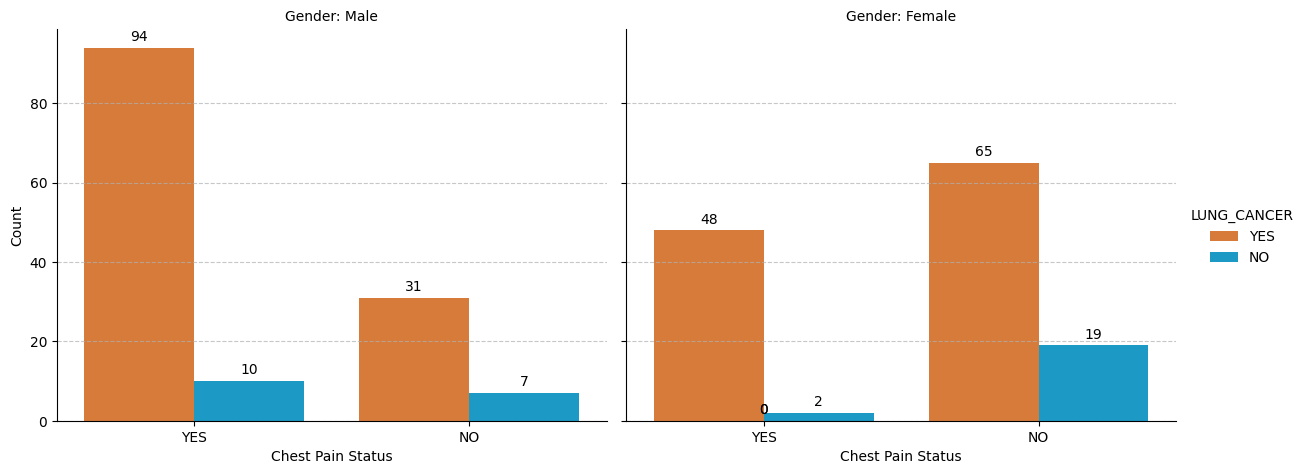

In [197]:
# Function for GENDER-wise analysis for a feature's effect on LUNG_CANCER

def gender_wise_feature_analysis(feature, data=df):

    g = sns.catplot(
        data=data,
        x=feature,
        hue='LUNG_CANCER',
        col='GENDER',
        kind='count',
        height=5,
        aspect=1.2,
        palette=custom_palette
    )

    g.set_axis_labels(f"{feature.replace('_', ' ').title()} Status", "Count")
    g.set_titles("Gender: {col_name}")
    g.fig.subplots_adjust(top=0.9)

    for ax in g.axes.flat:
        ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
        for p in ax.patches:
            if not pd.isna(p.get_height()):
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center',
                            va='baseline',
                            fontsize=10,
                            color='black',
                            xytext=(0, 5),
                            textcoords='offset points')

    plt.show()

df.columns = df.columns.str.strip()

features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

for feature in features:
    gender_wise_feature_analysis(feature, df)

## Gender-wise Analysis of Features and Lung Cancer

### Key Feature Associations

#### Yellow Fingers
- Strongly linked to lung cancer in both genders.
- Association slightly stronger in females (higher proportion of cases among those with yellow fingers).

#### Anxiety
- Strong association across genders.
- Males show slightly higher counts of lung cancer among those with anxiety.

#### Peer Pressure
- Notable association in males; weaker in females.
- Even males not influenced by peer pressure show high lung cancer counts, indicating other contributing factors.

#### Chronic Disease
- Strong correlation with lung cancer, higher prevalence in males.
- Significant number of lung cancer cases still occur among those without chronic diseases, suggesting multifactorial causes.

#### Fatigue
- Strong predictor for both genders.
- Males show slightly higher counts than females.

#### Allergy
- Moderate association in males; weaker in females.
- Males with allergies show higher lung cancer prevalence compared to those without.

#### Wheezing
- Significant correlation in both genders.
- Stronger effect in males.

#### Coughing
- Strong correlation in both genders.
- Higher number of cases among males.

#### Shortness of Breath
- Common in lung cancer cases for both genders.
- Slightly stronger association in males.

#### Swallowing Difficulty
- Moderate link, more visible in males.
- Fewer female cases associated.

#### Chest Pain
- Strong correlation across both genders.
- Males show substantially higher counts.

---

### General Observations
- Males generally show higher counts of lung cancer across most features.
- **Strongest predictors:** Chest pain, coughing, and fatigue.
- **Smoking-related indicators:** Yellow fingers and wheezing suggest behavioral and respiratory influences.
- **Multifactorial nature:** Presence of lung cancer even without certain symptoms indicates multiple contributing factors.


In [198]:
df.columns = df.columns.str.strip()

# Encoding map
encoding_map = {
    'Male': 1, 'Female': 0,
    'YES': 1, 'NO': 0
}

# List of categorical columns to encode

categorical_columns = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]

# Applying encoding

df_encoded = df.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].replace(encoding_map)

# Verifying the encoding
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


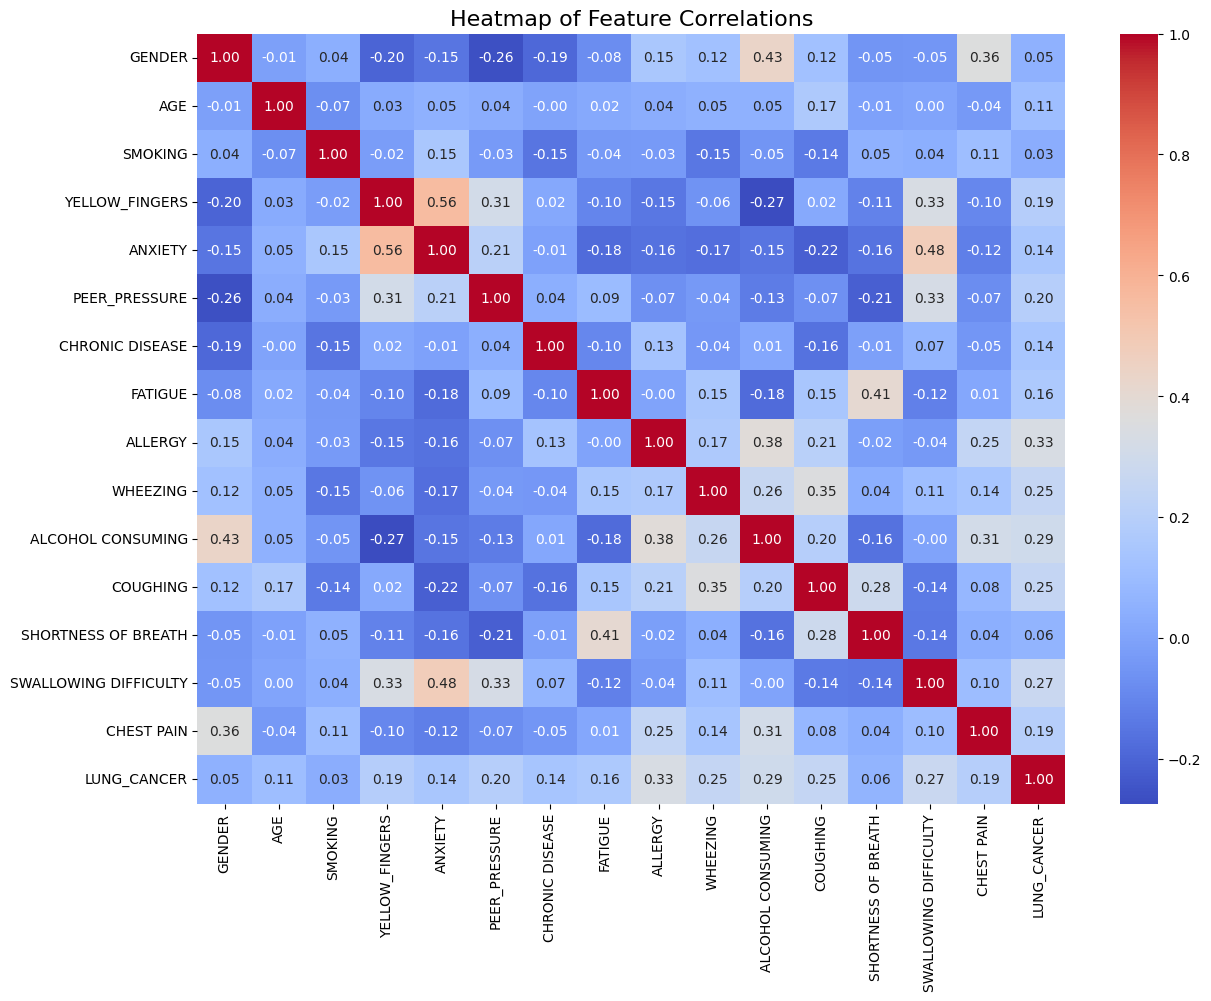

In [199]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

## Insights from Correlation Matrix

### Understanding Correlation
- **Positive Correlation (0 to 1):** As one feature increases, so does the other.
- **Negative Correlation (-1 to 0):** As one feature increases, the other decreases.
- **Near Zero:** Little to no linear relationship.

---

### Key Correlations with LUNG_CANCER

#### Positive Correlations
- **ALLERGY (0.334)** – Moderate correlation; may indicate immune-related patterns.
- **ALCOHOL CONSUMING (0.294)** – Moderate correlation; suggests lifestyle impact.
- **SWALLOWING DIFFICULTY (0.269)** – Symptom with notable link to lung cancer.
- **COUGHING (0.253)** – Moderate correlation; aligns with respiratory symptoms.
- **WHEEZING (0.249)** – Similar to coughing, respiratory indicator.
- **CHEST PAIN (0.195)** – Weak to moderate correlation; possible late-stage symptom.
- **YELLOW_FINGERS (0.189)** – Mild correlation; likely linked to smoking.
- **ANXIETY (0.144)** & **FATIGUE (0.160)** – Weak positive correlations, but potentially contributory.

#### Negative Correlations
- **PEER_PRESSURE (-0.214)** – Weak negative correlation; possible indirect behavioral influence.
- **SHORTNESS OF BREATH (-0.140)** – Unexpected weak negative correlation; may require further study.

#### Minimal Correlation
- **GENDER (0.054)** – Negligible relationship with lung cancer.

---

### Inter-Feature Correlations
- **YELLOW_FINGERS & ANXIETY (0.558)** – Strong correlation; may reflect smoking-related behavioral links.
- **YELLOW_FINGERS & PEER_PRESSURE (0.313)** – Moderate; peer influence may affect smoking.
- **CHEST PAIN & ALCOHOL CONSUMING (0.311)** – Moderate; possible shared health patterns.

#### Negative Inter-Feature Correlations
- **GENDER & YELLOW_FINGERS (-0.202)** – Suggests smoking is more prevalent in males.
- **GENDER & PEER_PRESSURE (-0.261)** – Indicates males report higher peer pressure.

---

### Key Observations
- **Most Correlated Symptoms:** ALLERGY, SWALLOWING DIFFICULTY, COUGHING, WHEEZING, CHEST PAIN.
- **Behavioral Factors:** ALCOHOL CONSUMING and YELLOW_FINGERS show moderate influence on lung cancer.
- **Unexpected Pattern:** SHORTNESS OF BREATH shows negative correlation, requiring further exploration.
- **Interdependencies:** YELLOW_FINGERS, ANXIETY, and PEER_PRESSURE suggest shared behavioral drivers.
- **Gender Impact:** Minimal direct correlation with lung cancer.


In [200]:
df_encoded=df_encoded.drop(columns=['GENDER','SHORTNESS OF BREATH'])
df_encoded

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,1,1,1,0,0,1,1,0,1,1,0,1
280,59,1,0,0,0,1,1,1,0,0,0,0,0,0
281,55,1,0,0,0,0,1,1,0,0,0,0,1,0
282,46,0,1,1,0,0,0,0,0,0,0,1,1,0


In [201]:
df_encoded['CHEST PAIN_Alcohol'] = df_encoded['CHEST PAIN'] * df_encoded['ALCOHOL CONSUMING']
df_encoded['Wheezing_Coughing'] = df_encoded['WHEEZING'] * df_encoded['COUGHING']
df_encoded['ANXIETY_YELLOW_FINGERS']=df_encoded['ANXIETY']*df_encoded['YELLOW_FINGERS']

In [202]:
# Defining the features (X) and target variable (y)

X = df_encoded.drop('LUNG_CANCER', axis=1)  # Features
y = df_encoded['LUNG_CANCER']  # Target variable

In [203]:
# Splitting the data into training and test sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_val.shape}")

Training set size: (220, 16)
Testing set size: (56, 16)


In [205]:
# Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [206]:
# Apply ADASYN

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [207]:
# Checking the distribution of the target after resampling

print("Original target distribution:\n")
print(y_train.value_counts())
print("\nResampled target distribution:\n")
print(pd.Series(y_train_resampled).value_counts())

Original target distribution:

LUNG_CANCER
1    194
0     26
Name: count, dtype: int64

Resampled target distribution:

LUNG_CANCER
1    194
0    194
Name: count, dtype: int64


## Justification for Using ADASYN

### Class Imbalance Issue
- Original dataset:
  - **LUNG_CANCER = YES** → 194 samples  
  - **LUNG_CANCER = NO** → 26 samples
- Imbalance risks:
  - Bias towards majority class.
  - Poor recall and precision for minority class.
  - Weak decision boundaries and poor generalization.

### Why ADASYN?
- **ADASYN (Adaptive Synthetic Sampling)** generates synthetic minority samples.
- Focuses on underrepresented regions, improving classification of difficult cases.

### Key Benefits
- **Balanced Dataset** – Post-ADASYN: 194 samples per class.
- **Improved Model Metrics** – Enhanced recall, F1-score, and AUC-ROC for minority class.
- **Better Decision Boundaries** – Creates more representative data near complex regions.


In [208]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Displaying model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'Support Vector Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']


Training and Evaluating Model: Logistic Regression
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.89      0.94        44

    accuracy                           0.91        56
   macro avg       0.85      0.94      0.88        56
weighted avg       0.94      0.91      0.92        56



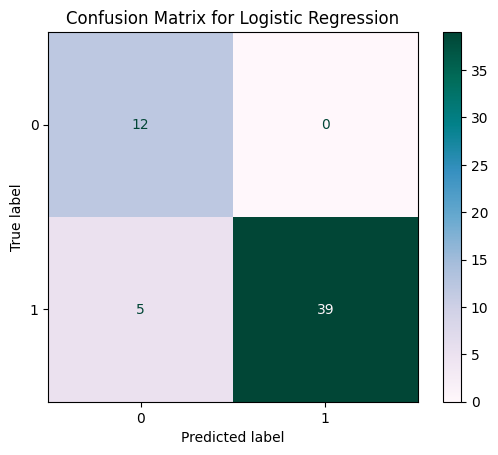

Training and Evaluating Model: Support Vector Classifier
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



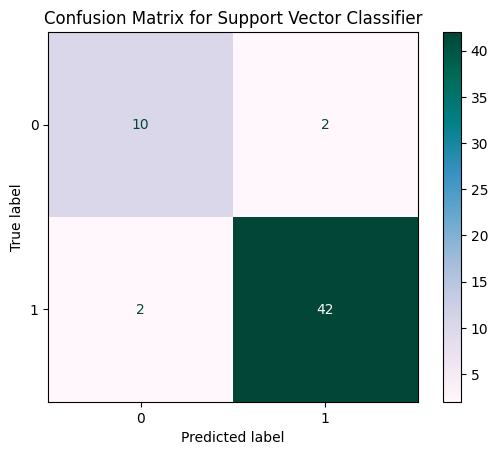

Training and Evaluating Model: K-Nearest Neighbors
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.86      0.93        44

    accuracy                           0.89        56
   macro avg       0.83      0.93      0.86        56
weighted avg       0.93      0.89      0.90        56



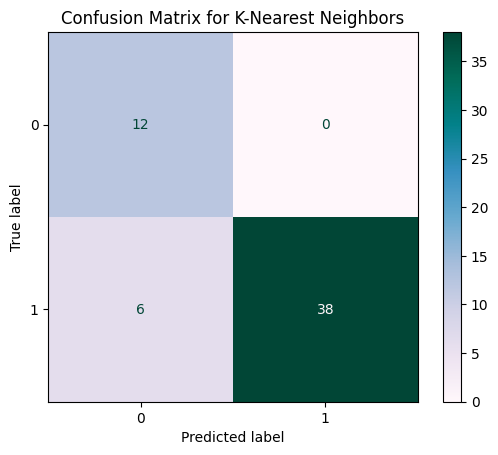

Training and Evaluating Model: Gaussian Naive Bayes
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.96      0.98      0.97        44

    accuracy                           0.95        56
   macro avg       0.93      0.91      0.92        56
weighted avg       0.95      0.95      0.95        56



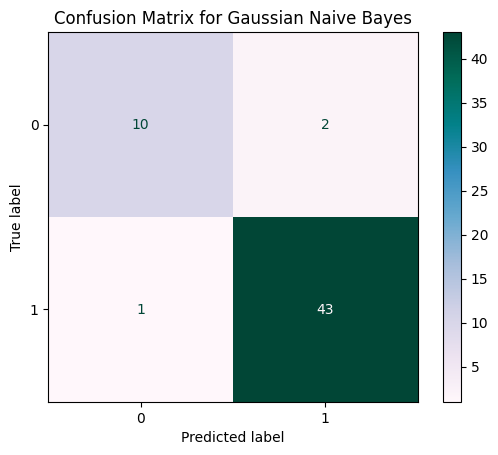

Training and Evaluating Model: Decision Tree
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.89      0.95      0.92        44

    accuracy                           0.88        56
   macro avg       0.84      0.77      0.79        56
weighted avg       0.87      0.88      0.87        56



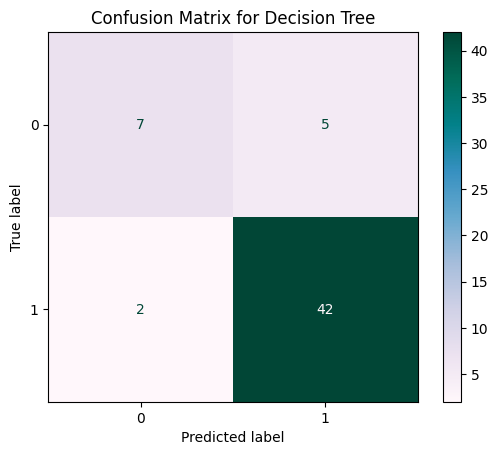

Training and Evaluating Model: Random Forest
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



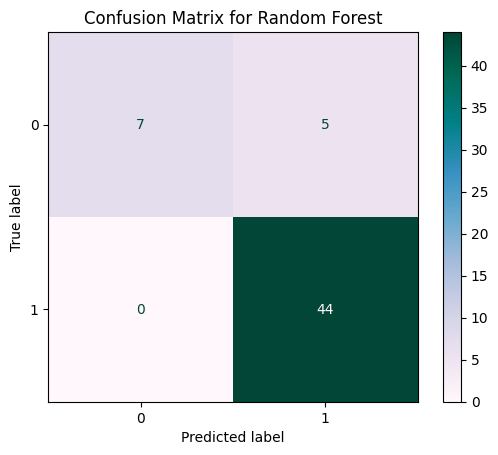

Training and Evaluating Model: Gradient Boosting
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



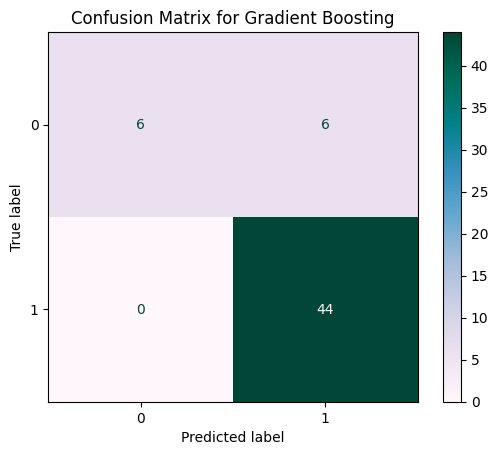

Training and Evaluating Model: XGBoost
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



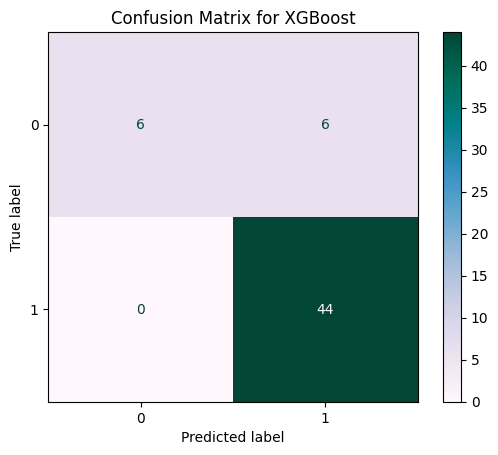


Model Evaluation Summary:
                       Model  Accuracy       AUC
0        Logistic Regression  0.910714  0.971591
1  Support Vector Classifier  0.928571  0.975379
2        K-Nearest Neighbors  0.892857  0.926136
3       Gaussian Naive Bayes  0.946429  0.916667
4              Decision Tree  0.875000  0.768939
5              Random Forest  0.910714  0.967803
6          Gradient Boosting  0.892857  0.971591
7                    XGBoost  0.892857  0.981061


In [209]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    evaluation_summary = []

    for name, model in models.items():
        print(f"Training and Evaluating Model: {name}\n{'-'*50}")

        # Training the model

        model.fit(X_train, y_train)

        # Predict on the test set

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics

        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

        # Append metrics to summary

        evaluation_summary.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc if auc != "N/A" else "N/A"
        })

        # Display classification report

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix

        conf_matrix = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
        disp.plot(cmap='PuBuGn', values_format='d')
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

    # Display evaluation summary

    summary_df = pd.DataFrame(evaluation_summary)
    print("\nModel Evaluation Summary:")
    print(summary_df)
    return summary_df

evaluation_summary = evaluate_models(models, X_train_resampled, X_val_scaled, y_train_resampled, y_val)

In [210]:
def cross_validation_accuracy(models, X, y, cv=5):
    cv_results = []

    for name, model in models.items():
        print(f"Cross-validating model: {name}...")
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        cv_results.append({
            "Model": name,
            "Mean Accuracy": scores.mean(),
            "Std Deviation": scores.std()
        })
        print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

    # Convert results to a DataFrame for better visualization

    cv_results_df = pd.DataFrame(cv_results)
    print("\nCross-Validation Results:")
    print(cv_results_df)
    return cv_results_df

cv_results = cross_validation_accuracy(models, X_train_scaled, y_train, cv=5)

Cross-validating model: Logistic Regression...
Logistic Regression: Mean Accuracy = 0.9136, Std Dev = 0.0223
Cross-validating model: Support Vector Classifier...
Support Vector Classifier: Mean Accuracy = 0.8864, Std Dev = 0.0287
Cross-validating model: K-Nearest Neighbors...
K-Nearest Neighbors: Mean Accuracy = 0.8955, Std Dev = 0.0308
Cross-validating model: Gaussian Naive Bayes...
Gaussian Naive Bayes: Mean Accuracy = 0.8727, Std Dev = 0.0490
Cross-validating model: Decision Tree...
Decision Tree: Mean Accuracy = 0.8864, Std Dev = 0.0287
Cross-validating model: Random Forest...
Random Forest: Mean Accuracy = 0.8909, Std Dev = 0.0391
Cross-validating model: Gradient Boosting...
Gradient Boosting: Mean Accuracy = 0.8727, Std Dev = 0.0468
Cross-validating model: XGBoost...
XGBoost: Mean Accuracy = 0.8727, Std Dev = 0.0308

Cross-Validation Results:
                       Model  Mean Accuracy  Std Deviation
0        Logistic Regression       0.913636       0.022268
1  Support Vector Cla

## Selecting the Best Model

### Criteria for Selection
1. **High Accuracy & AUC**
   - Logistic Regression, Support Vector Classifier (SVC), and Gaussian Naive Bayes show strong performance.
2. **Cross-Validation Consistency**
   - Logistic Regression: Highest mean accuracy **91.36%** with low standard deviation **2.23%**.
   - Random Forest and KNN also perform consistently.
3. **Precision & Recall (Minority Class)**
   - Logistic Regression, SVC, and Gaussian Naive Bayes provide balanced precision-recall for Class 0.

---

### Recommended Models

#### 1. Logistic Regression
- Accuracy: **91%**, AUC: **97.1%**
- Cross-validation: **91.36% ± 2.23%**
- Advantages: High performance, strong consistency, simple and interpretable.

#### 2. Support Vector Classifier (SVC)
- Accuracy: **92.9%**, AUC: **97.5%**
- Cross-validation: **88.64%** mean accuracy.
- Advantages: Excellent metrics but slightly lower consistency than Logistic Regression.
